In [83]:
!pip install pycaret==3.0.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [84]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [85]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.5.3
Seaborn version:  0.12.2


In [87]:
df = pd.read_csv('https://raw.githubusercontent.com/SALEH11DD/Dukhn-Project-INSE6223-2023/main/Medical%20application2.csv?token=GHSAT0AAAAAACCBCAJJIK2QCGNPDXLOS4UYZCNMY3A')
df.head(5)

PI         PT        LLA         SS          PR        DS  class
0  30.741938  13.354966  35.903526  17.386972  142.410107 -2.005373      0
1  37.140150  16.481240  24.000000  20.658910  125.014361  7.366425      0
2  38.505273  16.964297  35.112814  21.540976  127.632875  7.986683      0
3  36.422485  13.879424  20.242562  22.543061  126.076861  0.179717      0
4  44.489275  21.786433  31.474154  22.702842  113.778494 -0.284129      0

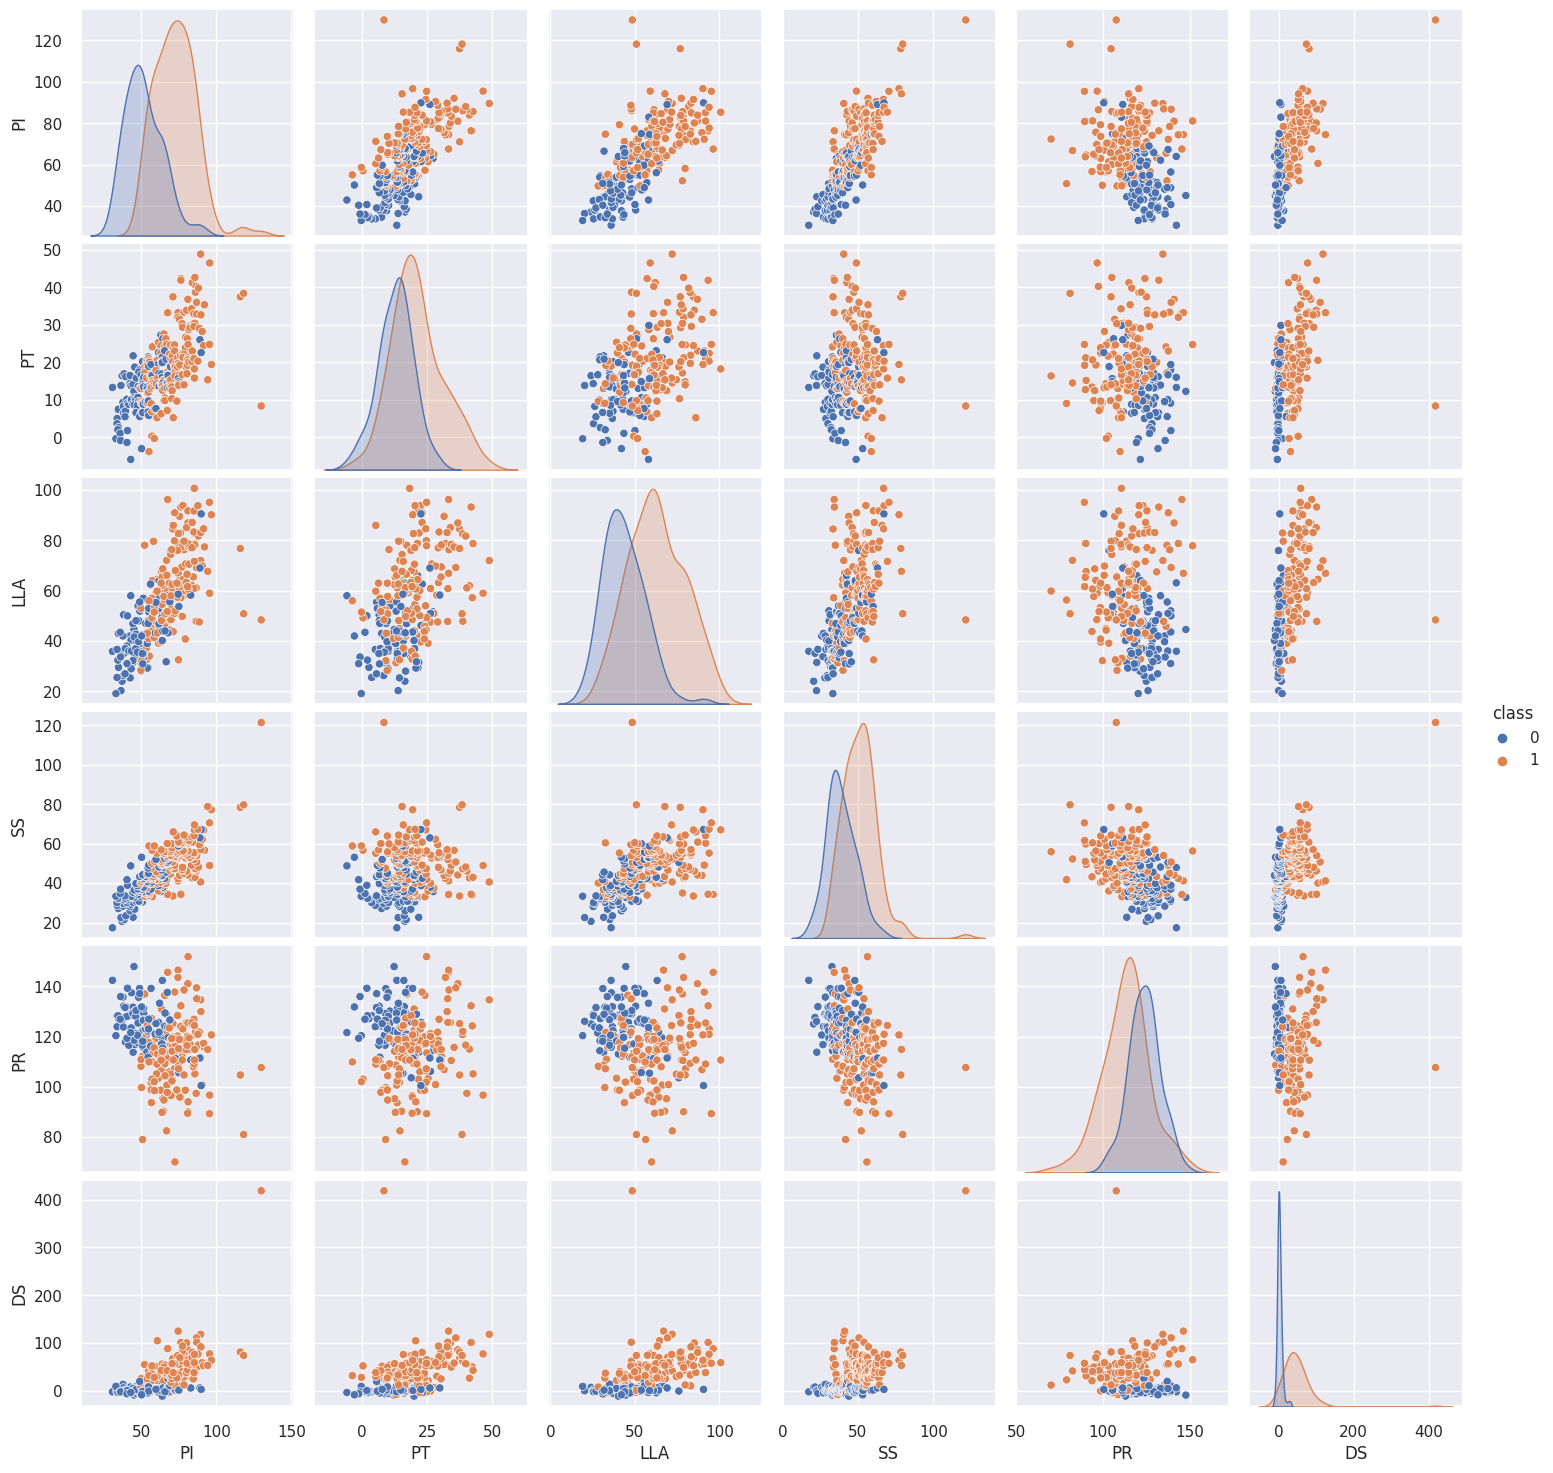

In [88]:
sns.pairplot(df, hue='class')
plt.show()

In [89]:
X = df.drop(columns=['class'])
X.head(10)

PI         PT        LLA         SS          PR        DS
0  30.741938  13.354966  35.903526  17.386972  142.410107 -2.005373
1  37.140150  16.481240  24.000000  20.658910  125.014361  7.366425
2  38.505273  16.964297  35.112814  21.540976  127.632875  7.986683
3  36.422485  13.879424  20.242562  22.543061  126.076861  0.179717
4  44.489275  21.786433  31.474154  22.702842  113.778494 -0.284129
5  39.656902  16.208839  36.674857  23.448063  131.922009 -4.968980
6  42.515610  16.541216  42.000000  25.974394  120.631941  7.876731
7  45.575482  18.759135  33.774143  26.816347  116.797007  3.131910
8  34.649922   7.514783  43.000000  27.135140  123.987741 -4.082938
9  42.517272  14.375671  25.323565  28.141601  128.905689  0.757020

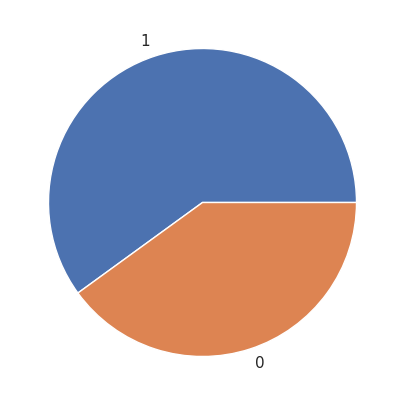

In [90]:
y =df['class']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()
#Number 1 stand for the Abnormal cases while 0 indicat the normal cases 

In [91]:
X.describe().transpose()

count        mean        std        min         25%         50%  \
PI   250.0   64.113155  16.621278  30.741938   51.376437   63.867807   
PT   250.0   17.848043   9.685796  -5.845994   12.148042   16.611073   
LLA  250.0   55.070057  17.610264  19.071075   42.000000   52.946114   
SS   250.0   46.265112  12.397037  17.386972   36.894509   45.000000   
PR   250.0  117.630089  13.015667  70.082575  110.668120  118.397026   
DS   250.0   28.514677  38.447750 -11.058179    1.706283   21.625303   

            75%         max  
PI    75.596735  129.834041  
PT    22.379333   48.903653  
LLA   65.449745  100.744220  
SS    54.220698  121.429566  
PR   125.643056  151.839857  
DS    50.019831  418.543082

In [92]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

PI        PT       LLA        SS        PR        DS
0 -2.011768 -0.464814 -1.090556 -2.334112  1.907680 -0.795398
1 -1.626055 -0.141397 -1.767854 -2.069653  0.568475 -0.551155
2 -1.543759 -0.091425 -1.135547 -1.998359  0.770061 -0.534990
3 -1.669319 -0.410558 -1.981649 -1.917364  0.650271 -0.738452
4 -1.183016  0.407431 -1.342583 -1.904450 -0.296514 -0.750540
5 -1.474334 -0.169577 -1.046668 -1.844217  1.100258 -0.872634
6 -1.301998 -0.135193 -0.743673 -1.640023  0.231096 -0.537856
7 -1.117535  0.094253 -1.211716 -1.571971 -0.064134 -0.661513
8 -1.776177 -1.068987 -0.686774 -1.546204  0.489441 -0.849543
9 -1.301898 -0.359221 -1.692545 -1.464855  0.868048 -0.723406

In [93]:
observations = list(df.index)
variables = list(df.columns)

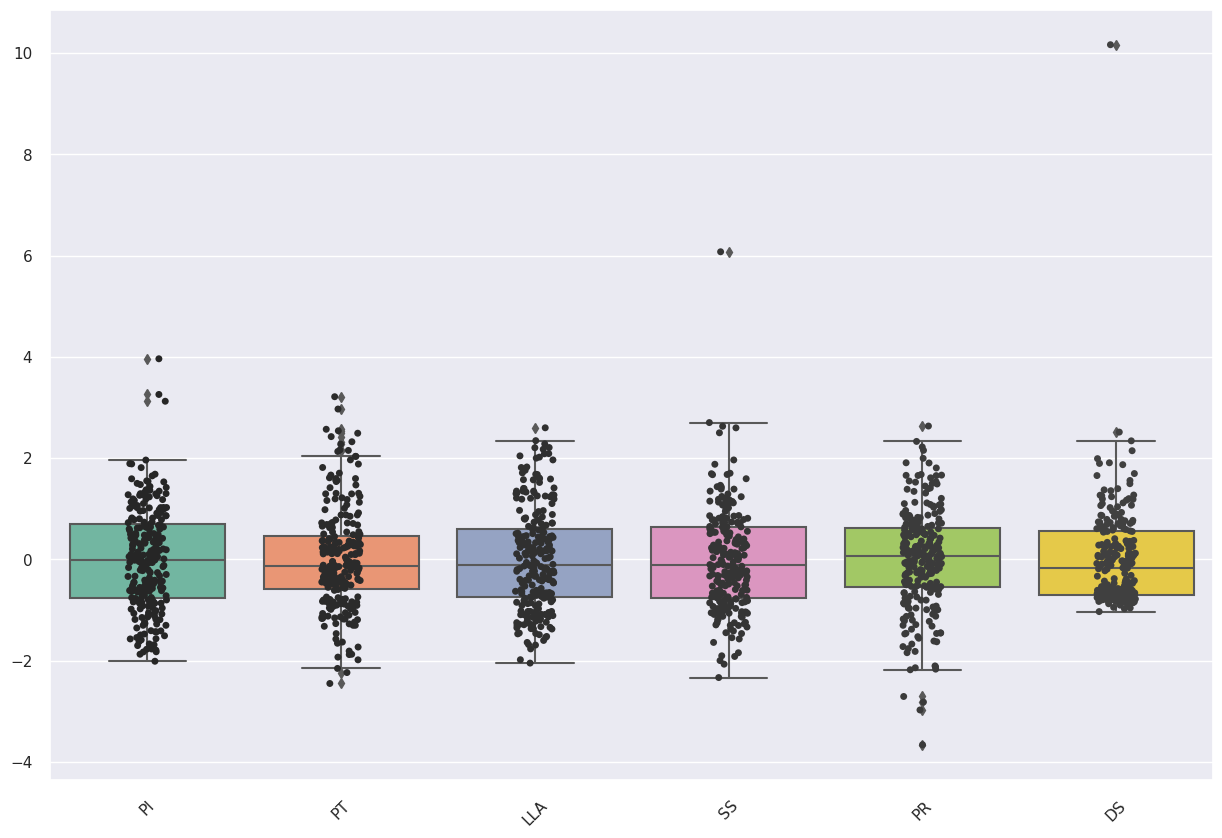

In [94]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()

ax = plt.figure(figsize=(15,10))    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);
     

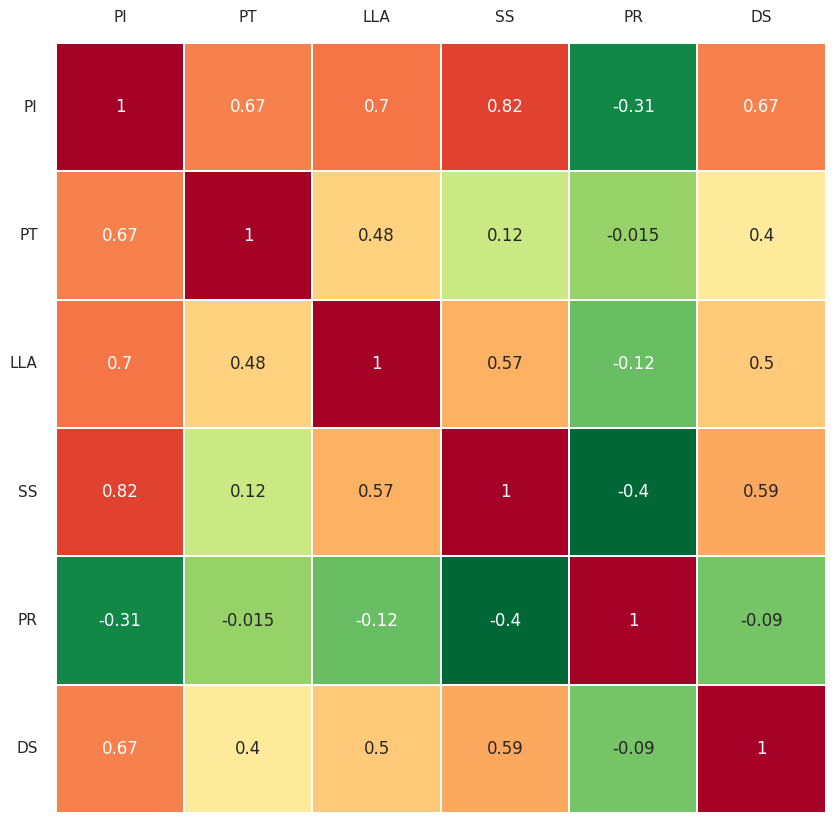

In [95]:
fig1,ax1 = plt.subplots(figsize=(15,10))
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.3, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

**Applying PCA**

Text(0, 0.5, 'Z2')

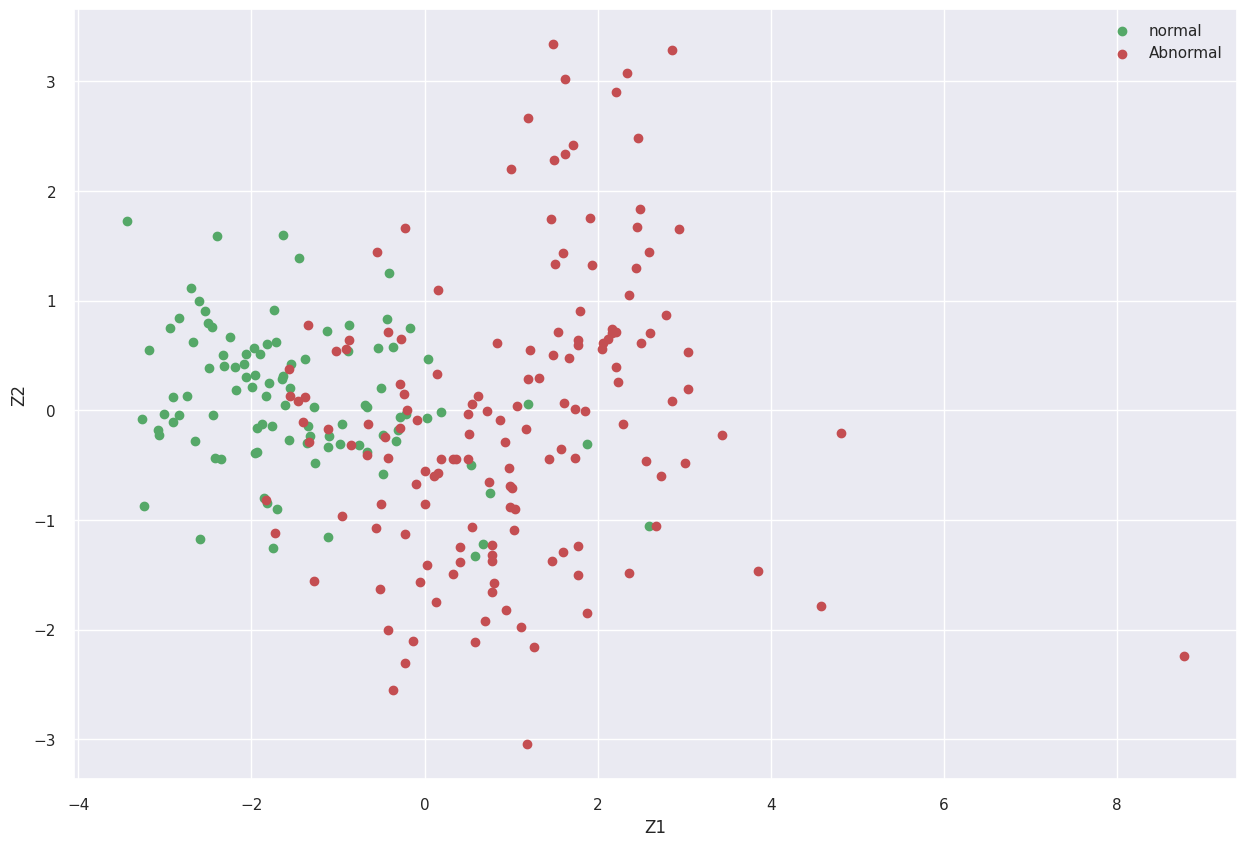

In [96]:
pca = PCA()
Z = pca.fit_transform(X)

# (Malignant)->1,  (Benign)->0

idx_normal= np.where(y == 0)
idx_Abnormal = np.where(y == 1)


plt. figure(figsize=(15,10))
plt.scatter(Z[idx_normal,0], Z[idx_normal,1], c='g', label='normal')
plt.scatter(Z[idx_Abnormal,0], Z[idx_Abnormal,1], c='r', label='Abnormal')


plt.legend()
plt.xlabel('Z1')
plt.ylabel('Z2')

array([[ 5.30491091e-01,  2.60160783e-02, -9.06569461e-02,
         2.43505341e-02,  4.26181155e-01,  7.26264662e-01],
       [ 3.37339265e-01,  5.31083129e-01, -6.16717738e-01,
         1.68192692e-01,  1.28095699e-01, -4.23219650e-01],
       [ 4.35805175e-01,  1.57634968e-01,  7.18265733e-02,
        -7.31450119e-01, -4.95021953e-01, -9.20818977e-12],
       [ 4.47690903e-01, -3.80053926e-01,  3.60293198e-01,
        -9.87609510e-02,  4.71319622e-01, -5.41686965e-01],
       [-1.87678602e-01,  7.32267624e-01,  5.62833975e-01,
        -1.11946086e-01,  3.15034697e-01, -5.70260505e-12],
       [ 4.23325962e-01,  1.08481476e-01,  3.99610087e-01,
         6.43283252e-01, -4.85309526e-01,  2.48763787e-11]])

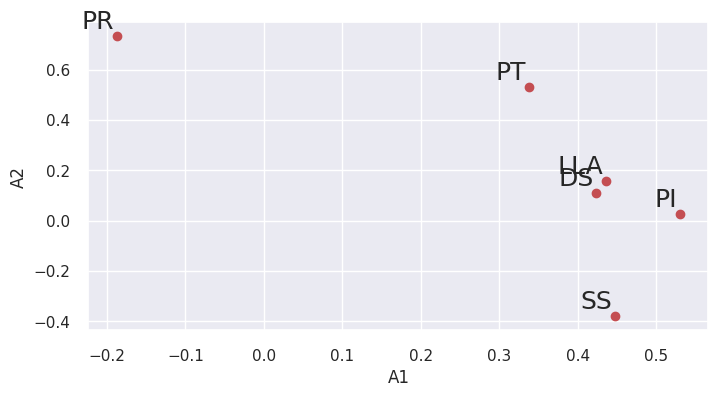

In [104]:

A = pca.components_.T 
plt. figure(figsize=(8,4))

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('A1')
plt.ylabel('A2')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')
A

array([3.35076516e+00, 1.15279520e+00, 7.33061488e-01, 4.90469230e-01,
       2.97005302e-01, 4.23057572e-20])

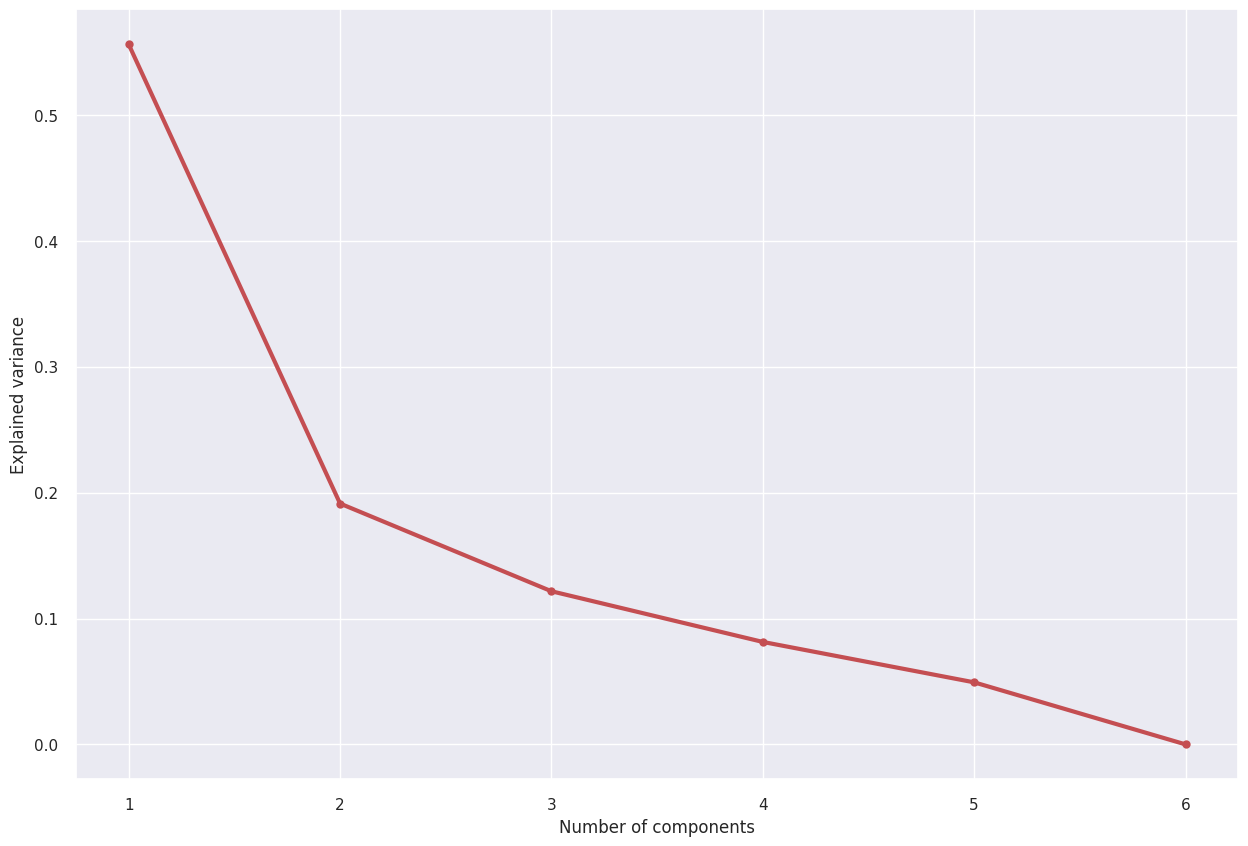

In [105]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
x = np.arange(len(Lambda)) + 1
plt. figure(figsize=(15,10))
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
Lambda

Text(0, 0.5, 'Cumulative explained variance')

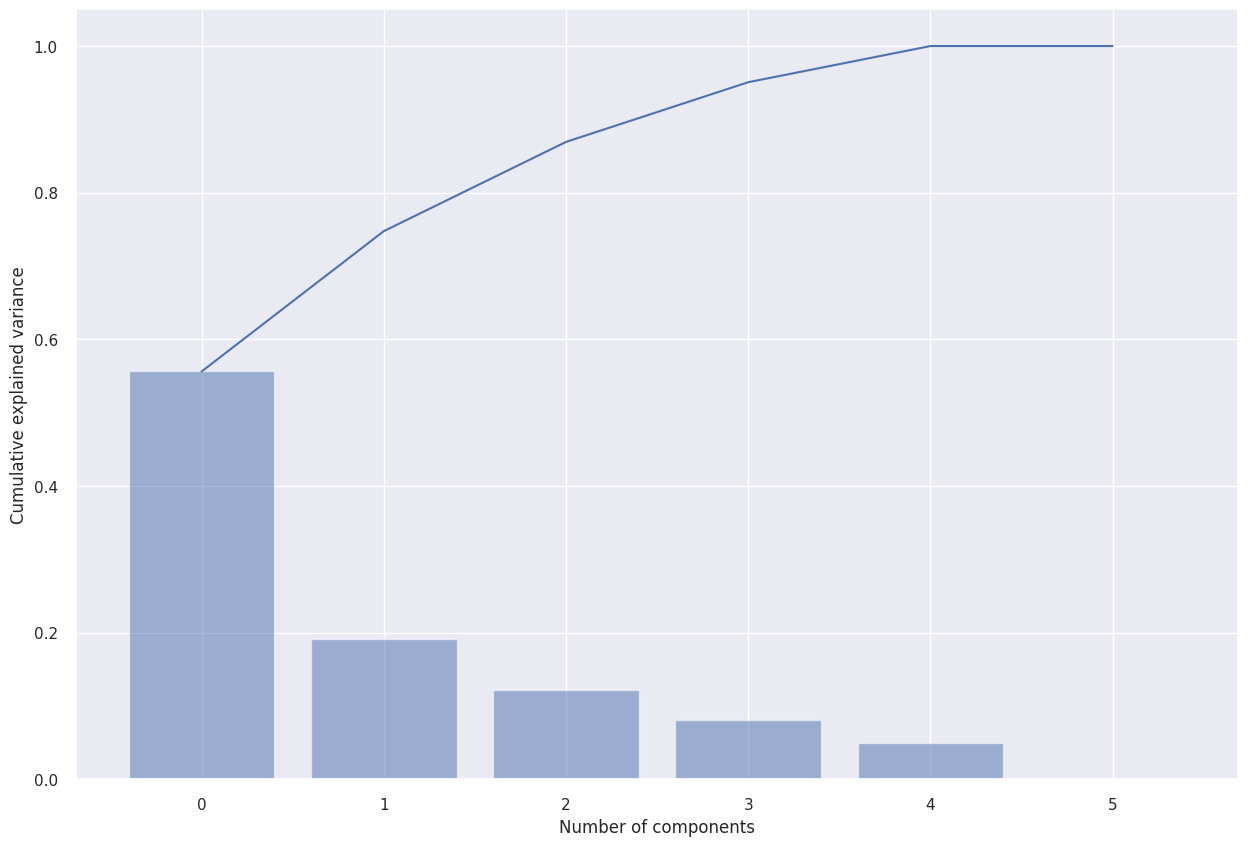

In [106]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt. figure(figsize=(15,10))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


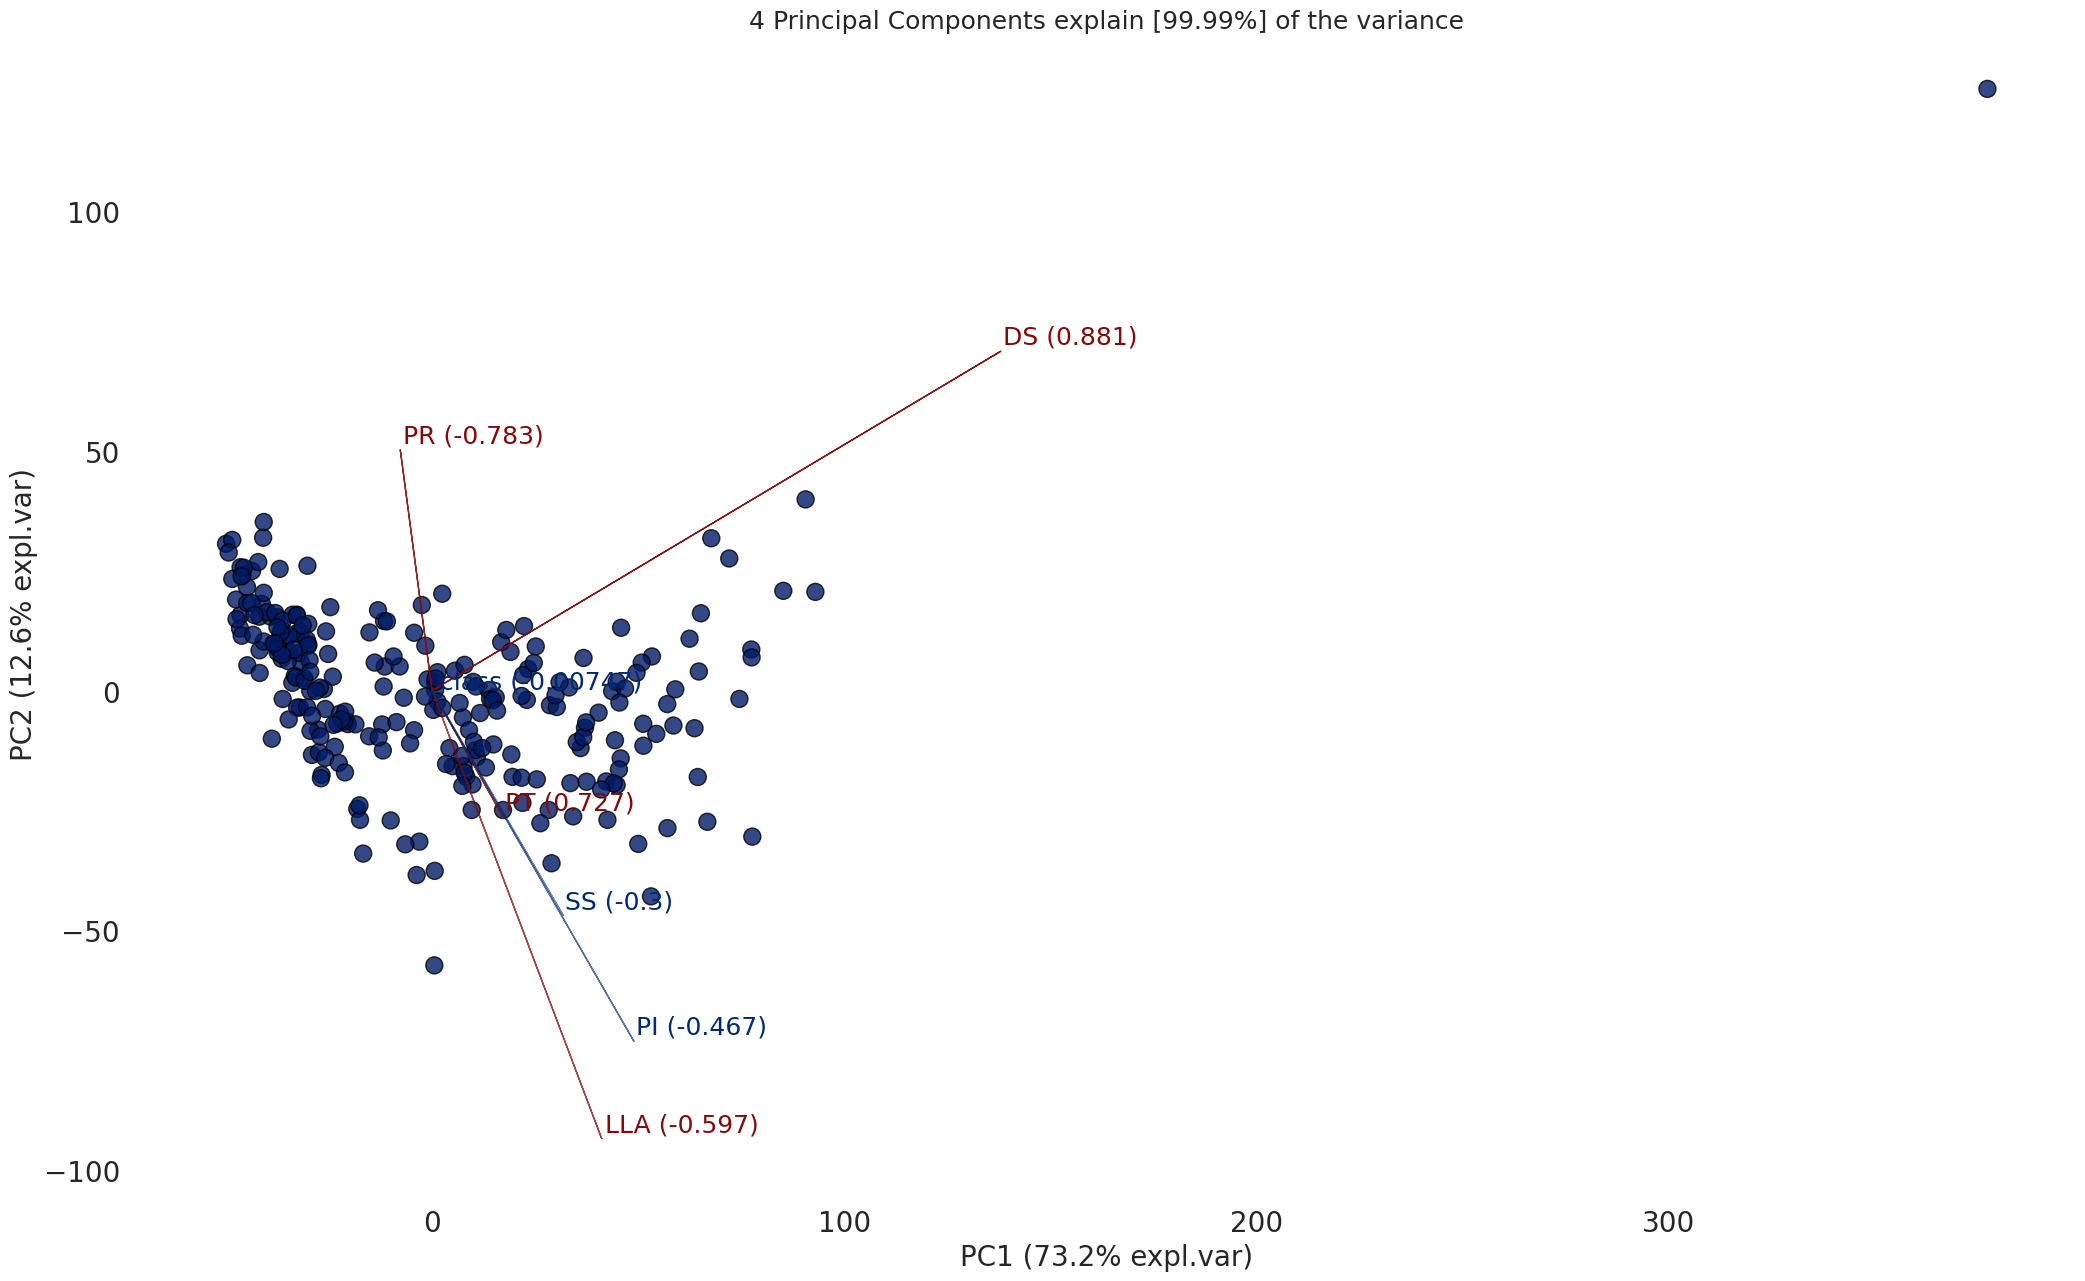

(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '4 Principal Components explain [99.99%] of the variance'}, xlabel='PC1 (73.2% expl.var)', ylabel='PC2 (12.6% expl.var)'>)

In [107]:
model.biplot(label=False, legend=False)


In [103]:
comps = pd.DataFrame(A,columns = variables)
sns.heatmap(comps,cmap='RdYlGn_r', linewidths=0.5, annot=True, 
            cbar=True, square=True)
ax.tick_params(labelbottom=False,labeltop=True)
plt.title('Principal components')

ValueError: ignored

In [ ]:
#Hotelling's T2 test
alpha = 0.05
p=Z.shape[1]
n=Z.shape[0]
from scipy.stats import beta
UCL=((n-1)**2/n )*beta.ppf(1-alpha, p / 2 , (n-p-1)/ 2)
UCL2=p*(n+1)*(n-1)/(n*(n-p) )*f.ppf(1-alpha, p , n-p)
Tsquare=np.array([0]*Z.shape[0])
for i in range(Z.shape[0]):
  Tsquare[i] = np.matmul(np.matmul(np.transpose(Z[i]),np.diag(1/Lambda) ) , Z[i])

NameError: ignored

In [108]:
!pip install pca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [109]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [6] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [4] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [6] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


In [ ]:
out['PC']

PC1       PC2       PC3       PC4
0   -3.438999  1.726632  0.305602  0.175817
1   -2.947321  0.746993 -0.538335  1.015934
2   -2.610315  0.997620 -0.385593  0.544632
3   -3.180703  0.550920 -0.357713  0.981308
4   -2.189921  0.399211 -1.393426  0.760221
..        ...       ...       ...       ...
245  3.436133 -0.223159  1.265802 -1.063555
246  4.813266 -0.210706 -0.524734  0.252003
247  2.678210 -1.058825  1.130976 -0.345956
248  4.582835 -1.783118 -1.765384  1.425795
249  8.772869 -2.242306  6.036120  6.234883

[250 rows x 4 columns]

[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '4 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (55.6% expl.var)', ylabel='PC2 (19.1% expl.var)'>)

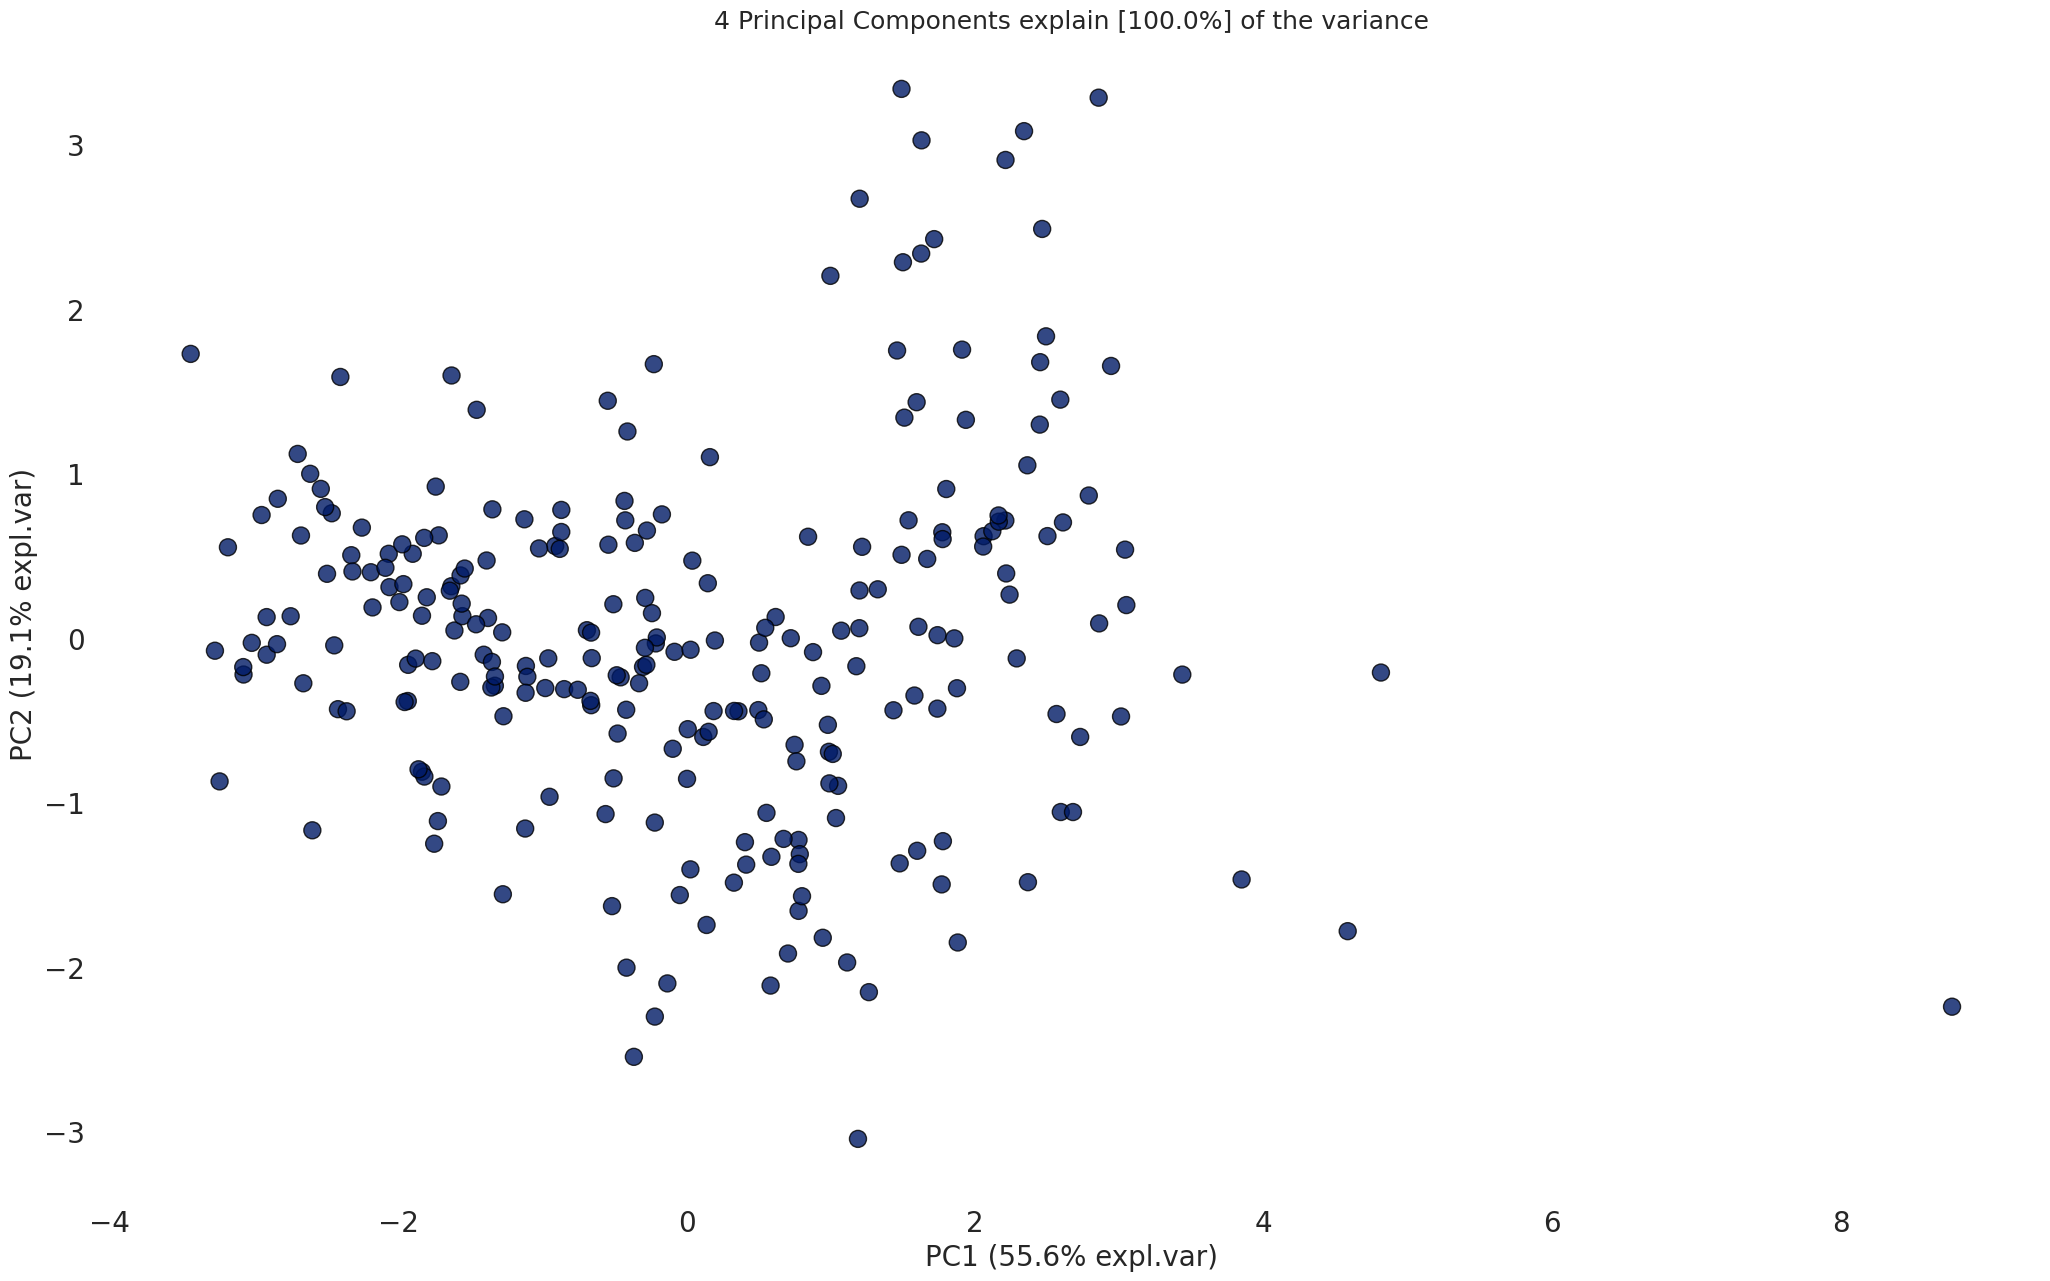

In [110]:
model.scatter(label=True, legend=False)

In [111]:
A = out['loadings'].T
A

PC1       PC2       PC3       PC4
PI   0.530491  0.026016 -0.090657  0.024351
PT   0.337339  0.531083 -0.616718  0.168193
LLA  0.435805  0.157635  0.071827 -0.731450
SS   0.447691 -0.380054  0.360293 -0.098761
PR  -0.187679  0.732268  0.562834 -0.111946
DS   0.423326  0.108481  0.399610  0.643283

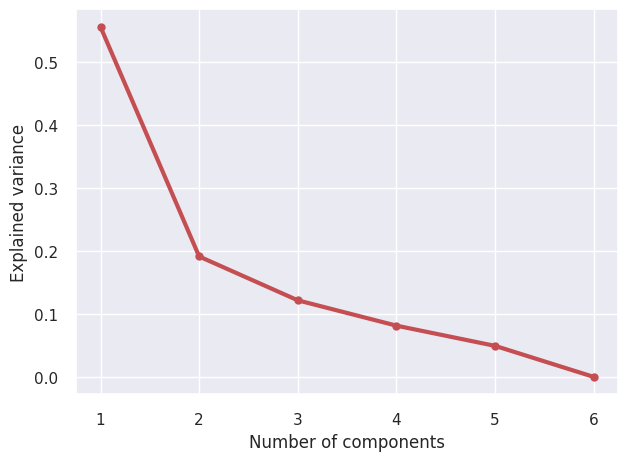

In [112]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

In [113]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
# use seaborn plotting style defaults
import seaborn as sns
sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (12,8)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

from scipy.stats import beta
from scipy.stats import f

from itertools import cycle

In [114]:
!pip install pca
     

from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(df)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [7] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [4] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [7] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


In [115]:
 # Print the top features. The results show that f1 is best, followed by f2 etc
print(out['topfeat'])

    PC feature   loading  type
0  PC1      DS  0.881486  best
1  PC2     LLA -0.597079  best
2  PC3      PR -0.783204  best
3  PC4      PT  0.726733  best
4  PC2      PI -0.467232  weak
5  PC4      SS -0.300499  weak
6  PC2   class -0.007475  weak


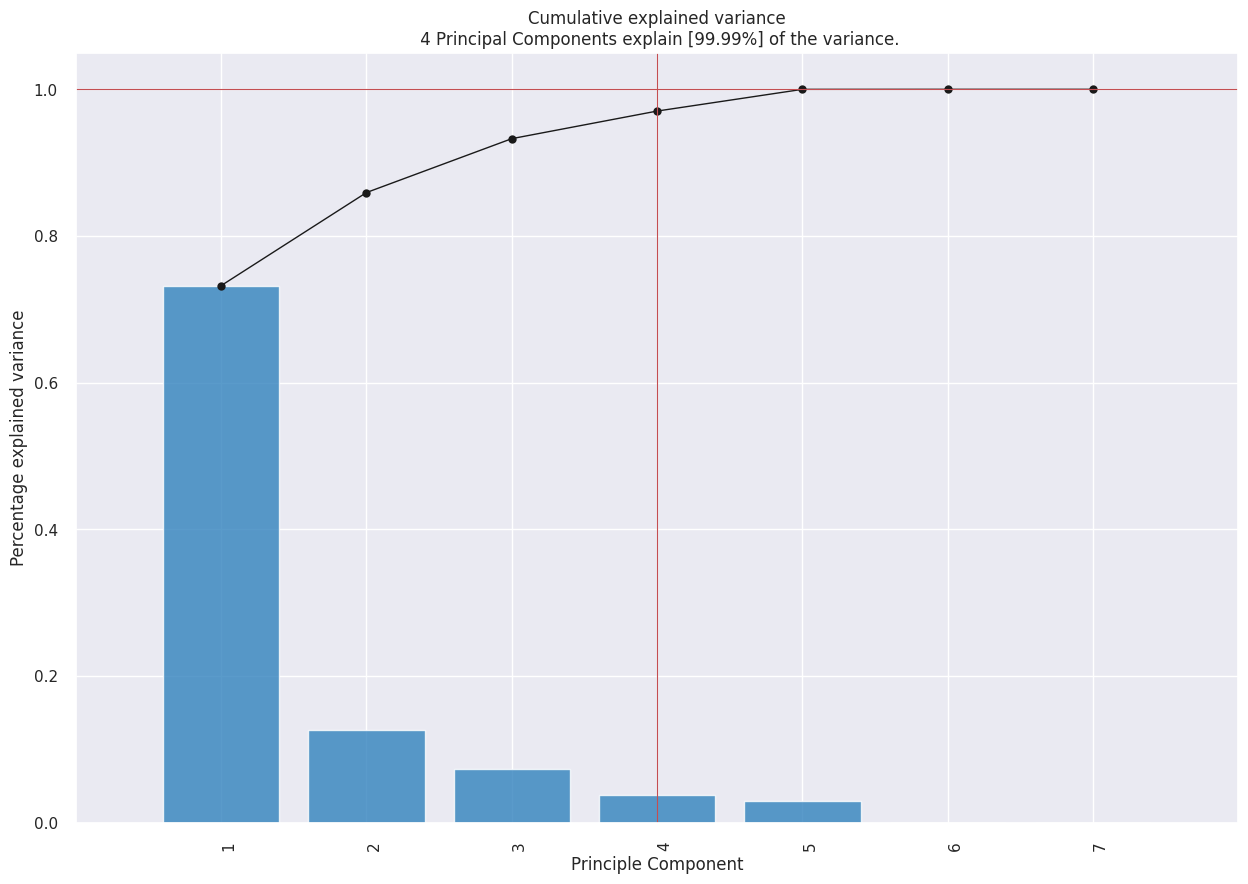

<Figure size 1200x800 with 0 Axes>

In [116]:
model.plot();


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


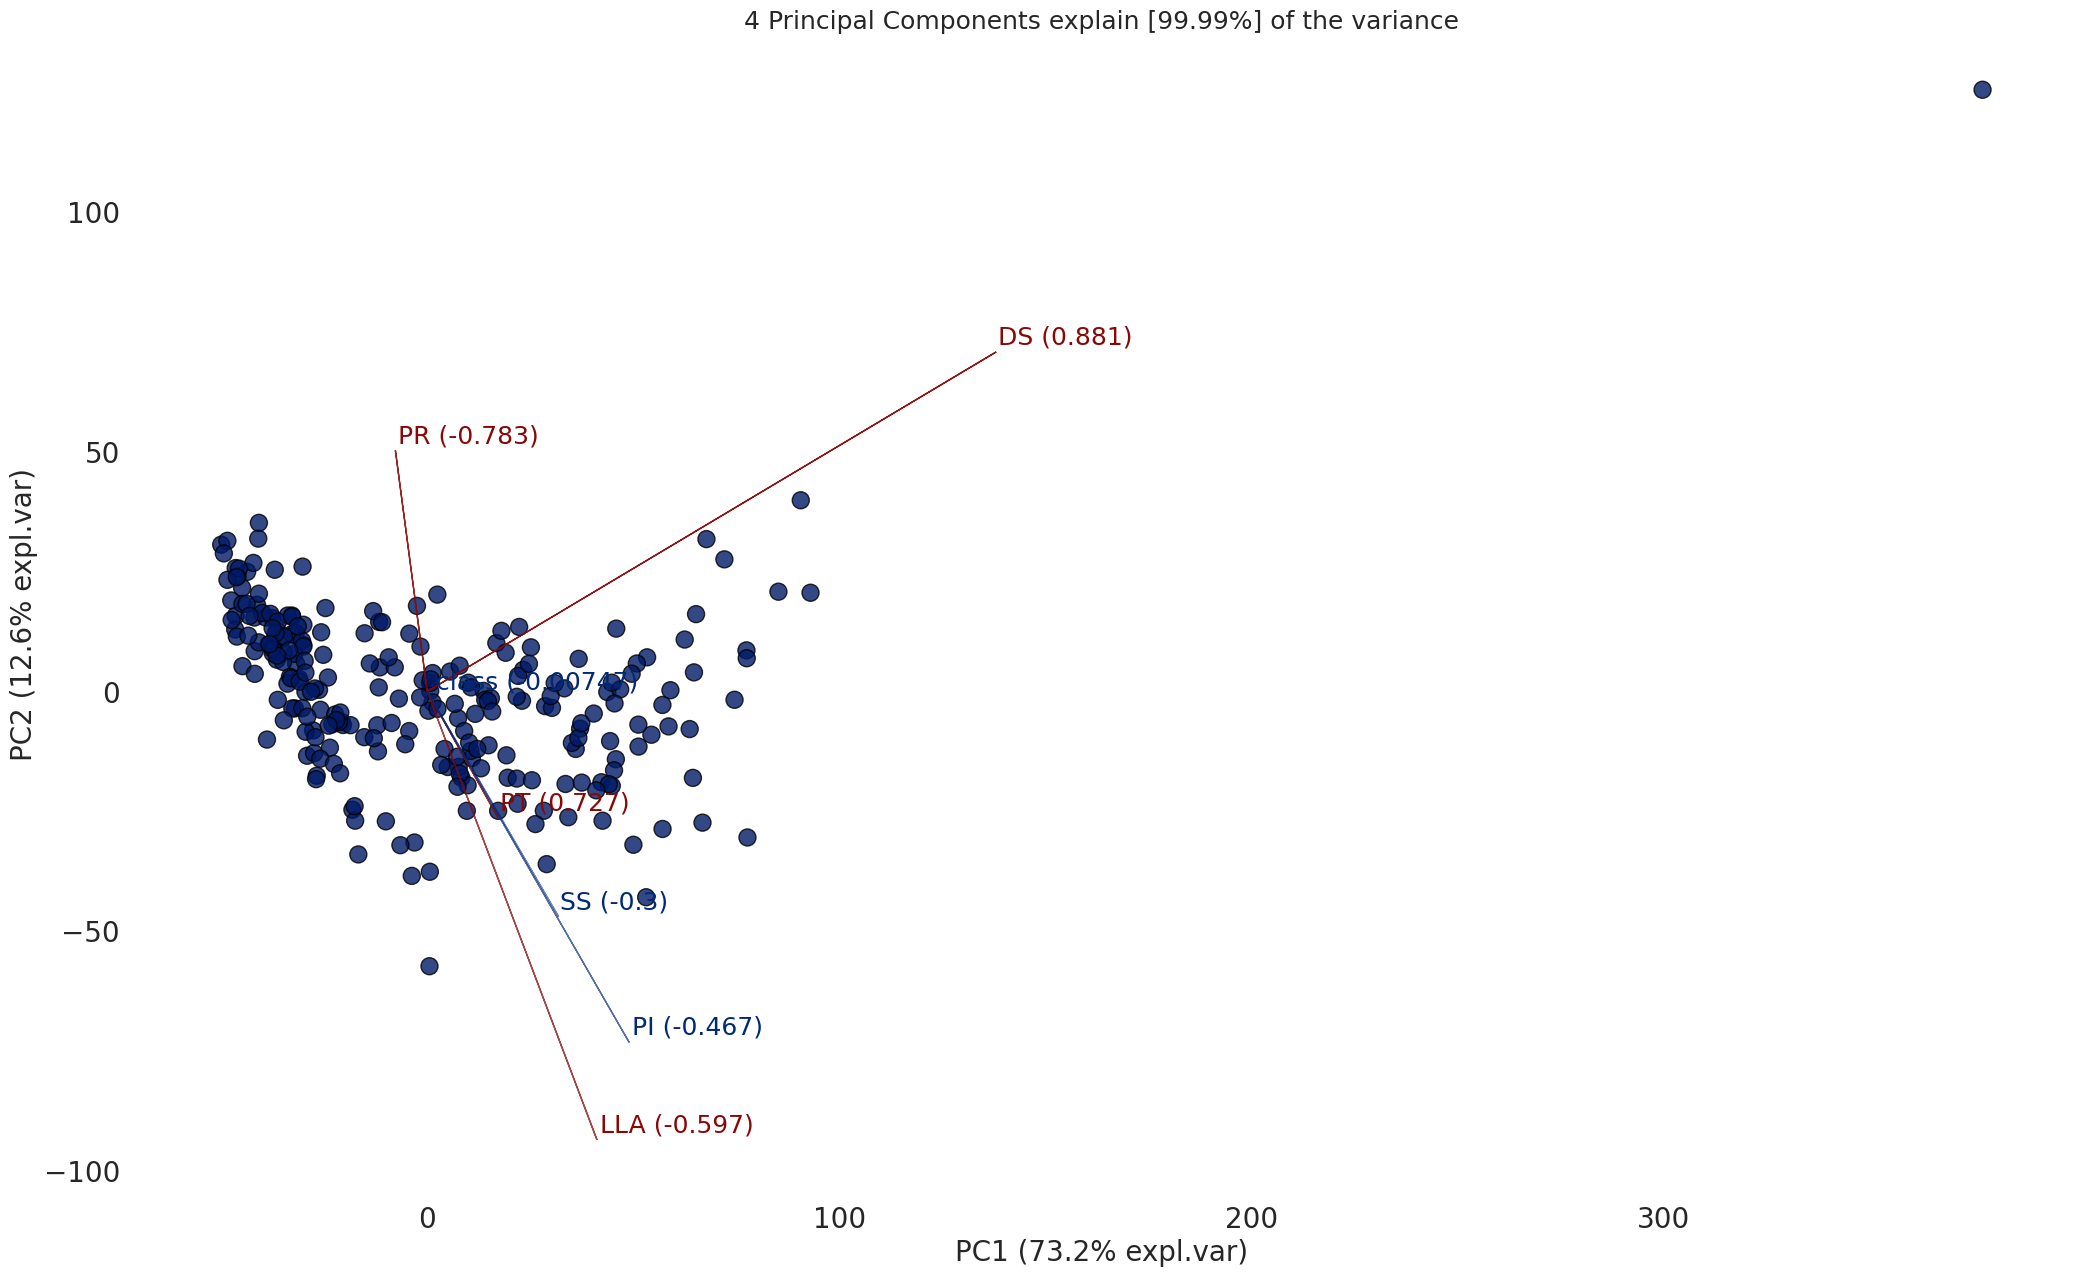

In [ ]:
ax = model.biplot(label=False, legend=False)

In [117]:
model.biplot(legend=False, hotellingt2=True)

TypeError: ignored

[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


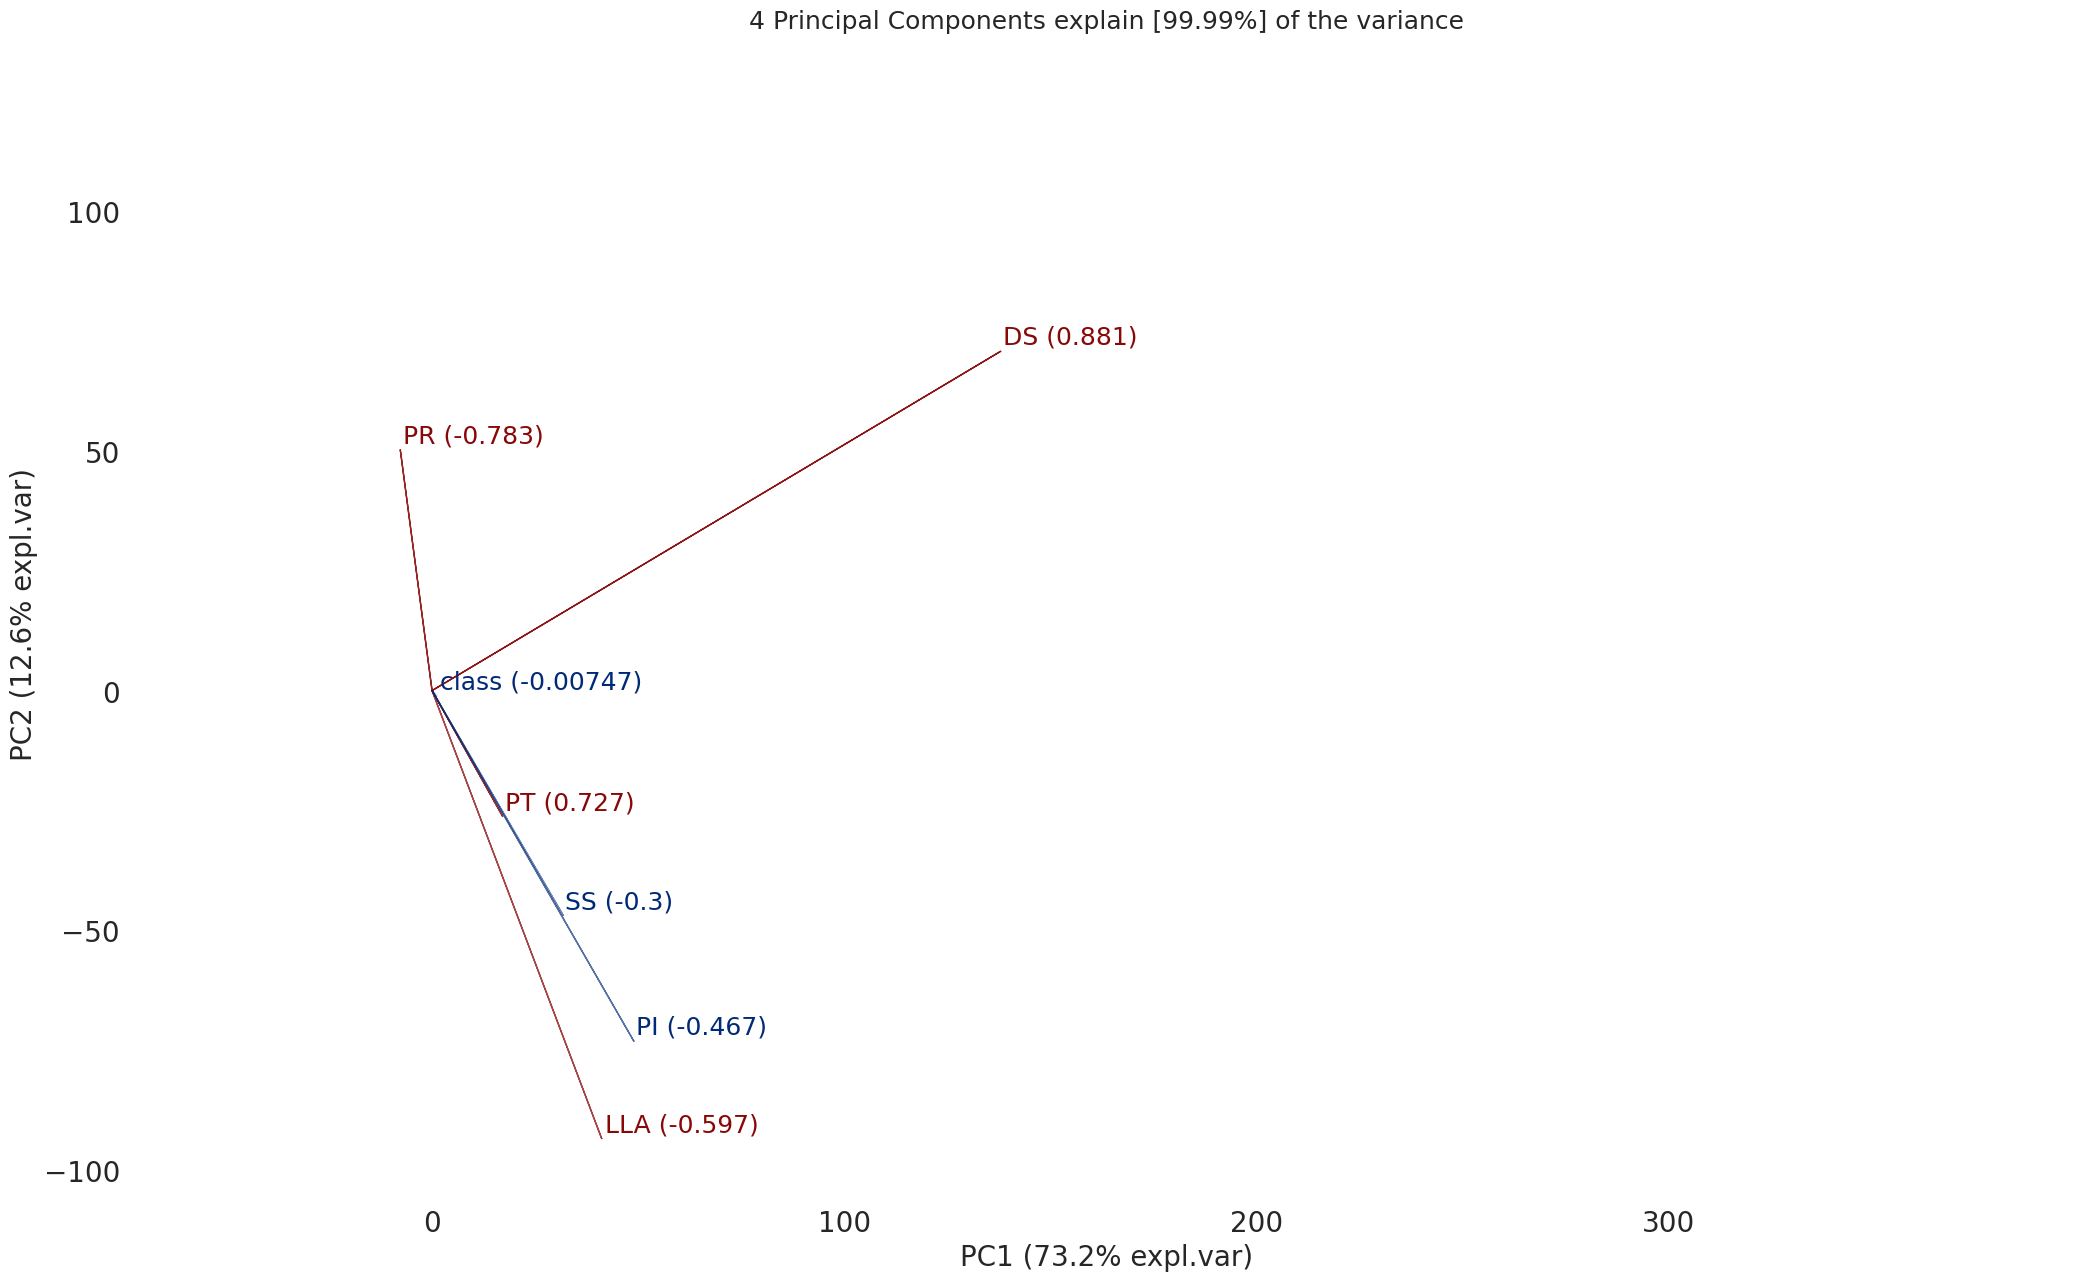

(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '4 Principal Components explain [99.99%] of the variance'}, xlabel='PC1 (73.2% expl.var)', ylabel='PC2 (12.6% expl.var)'>)

In [118]:
model.biplot(cmap=None, label=False, legend=False)


[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


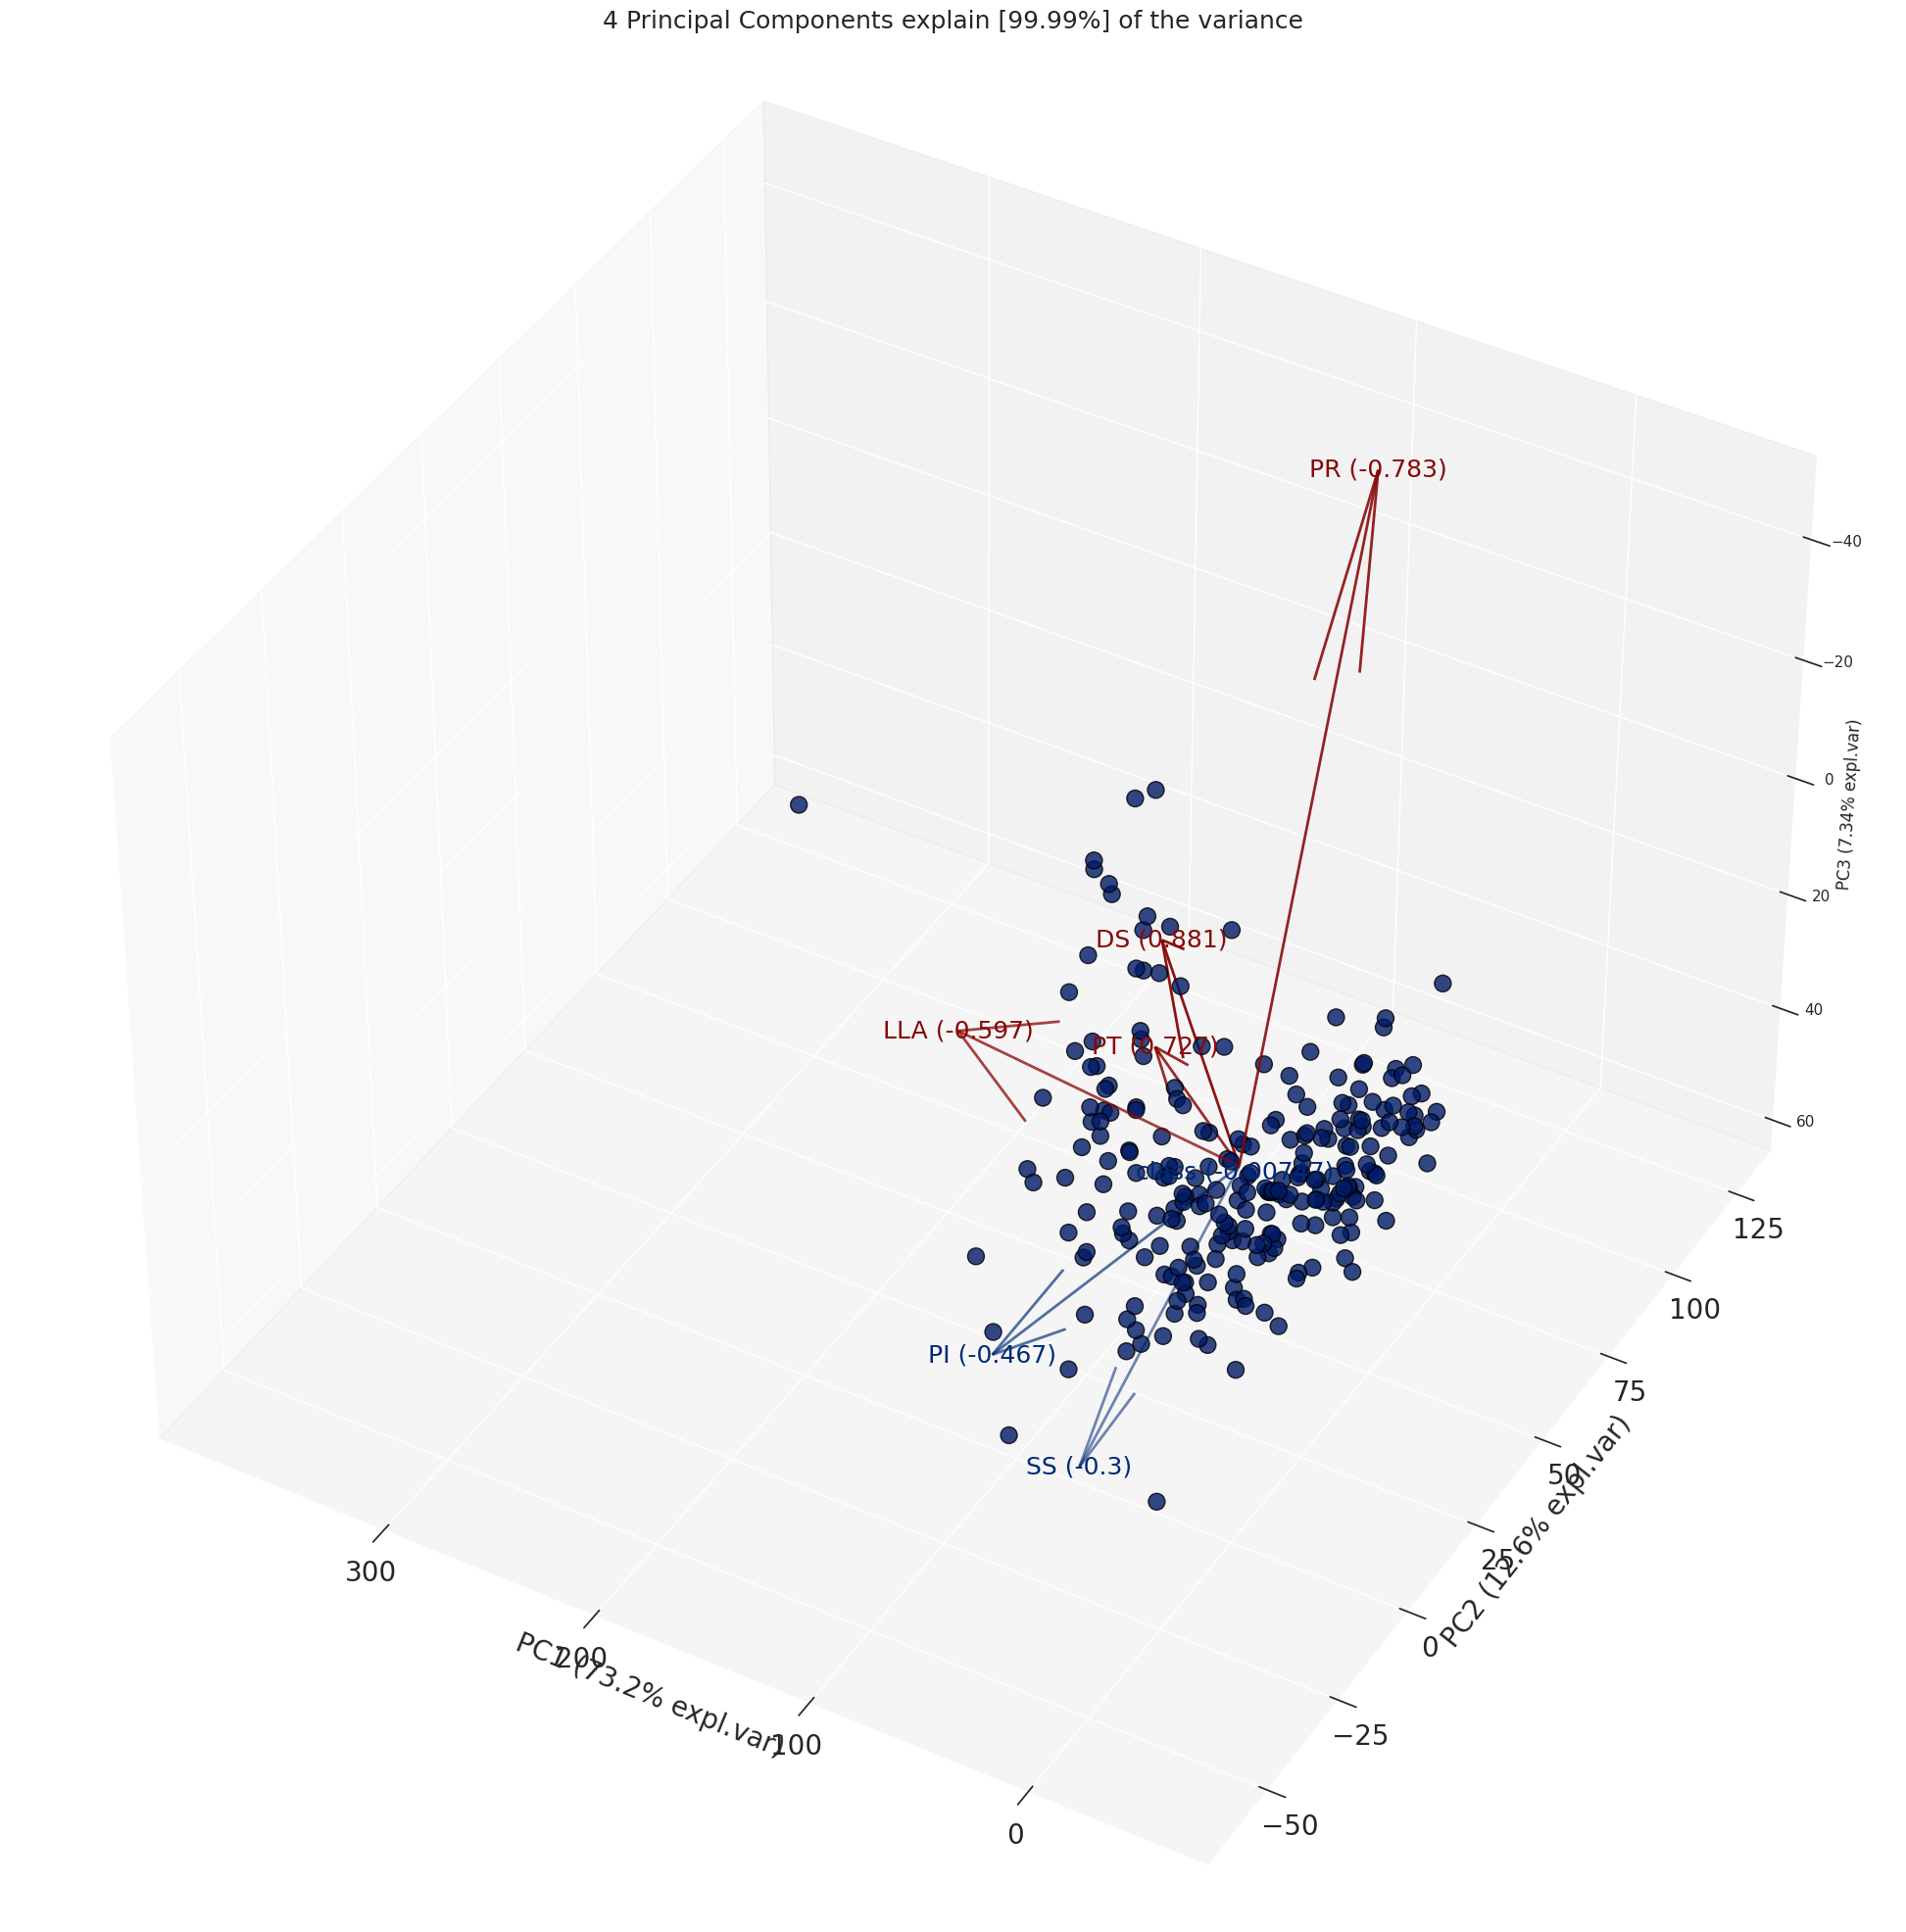

In [119]:
ax = model.biplot3d(legend=False)


/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


AttributeError: ignored

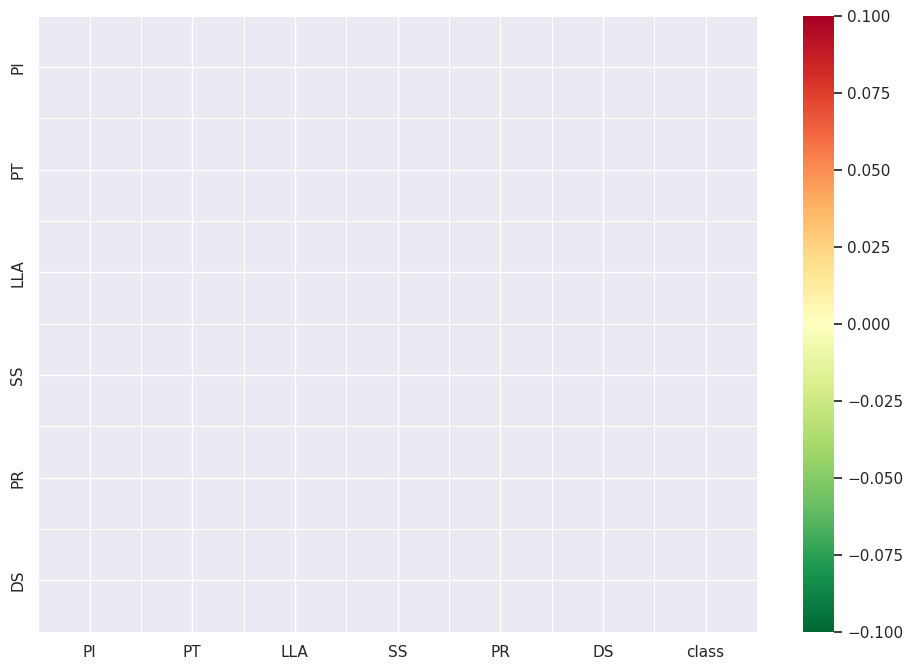

In [ ]:
comps = pd.DataFrame(A, columns = variables)
sns.heatmap(comps,cmap='RdYlGn_r', linewidths=0.5, annot=True, 
            cbar=True, square=True)
ax.tick_params(labelbottom=False,labeltop=True)
plt.xticks(rotation=90)
plt.title('Principal components')
plt.show()

print(f'PC1:{A1}')
print(f'PC2:{A2}')

**Classification**

In [123]:
from pycaret.utils import version
version()

'3.0.0'

In [121]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)
#dr = df.drop(columns=['id'])

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (225, 7)
Unseen Data For Predictions: (25, 7)


In [124]:
from pycaret.classification import *
clf = setup(data=data, target='class', train_size=0.7, session_id=123)

In [125]:
#show the best model and their statistics
best_model = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [127]:
best_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)

In [128]:
#Create Decision Tree Classifier


dt = create_model('dt')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [129]:
#Tune Decision Tree Model


tuned_dt = tune_model(dt)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

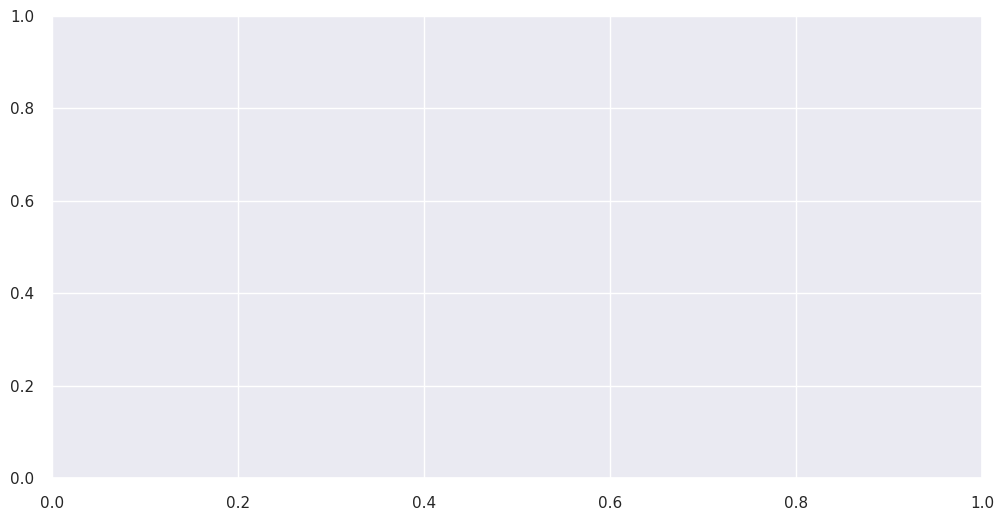

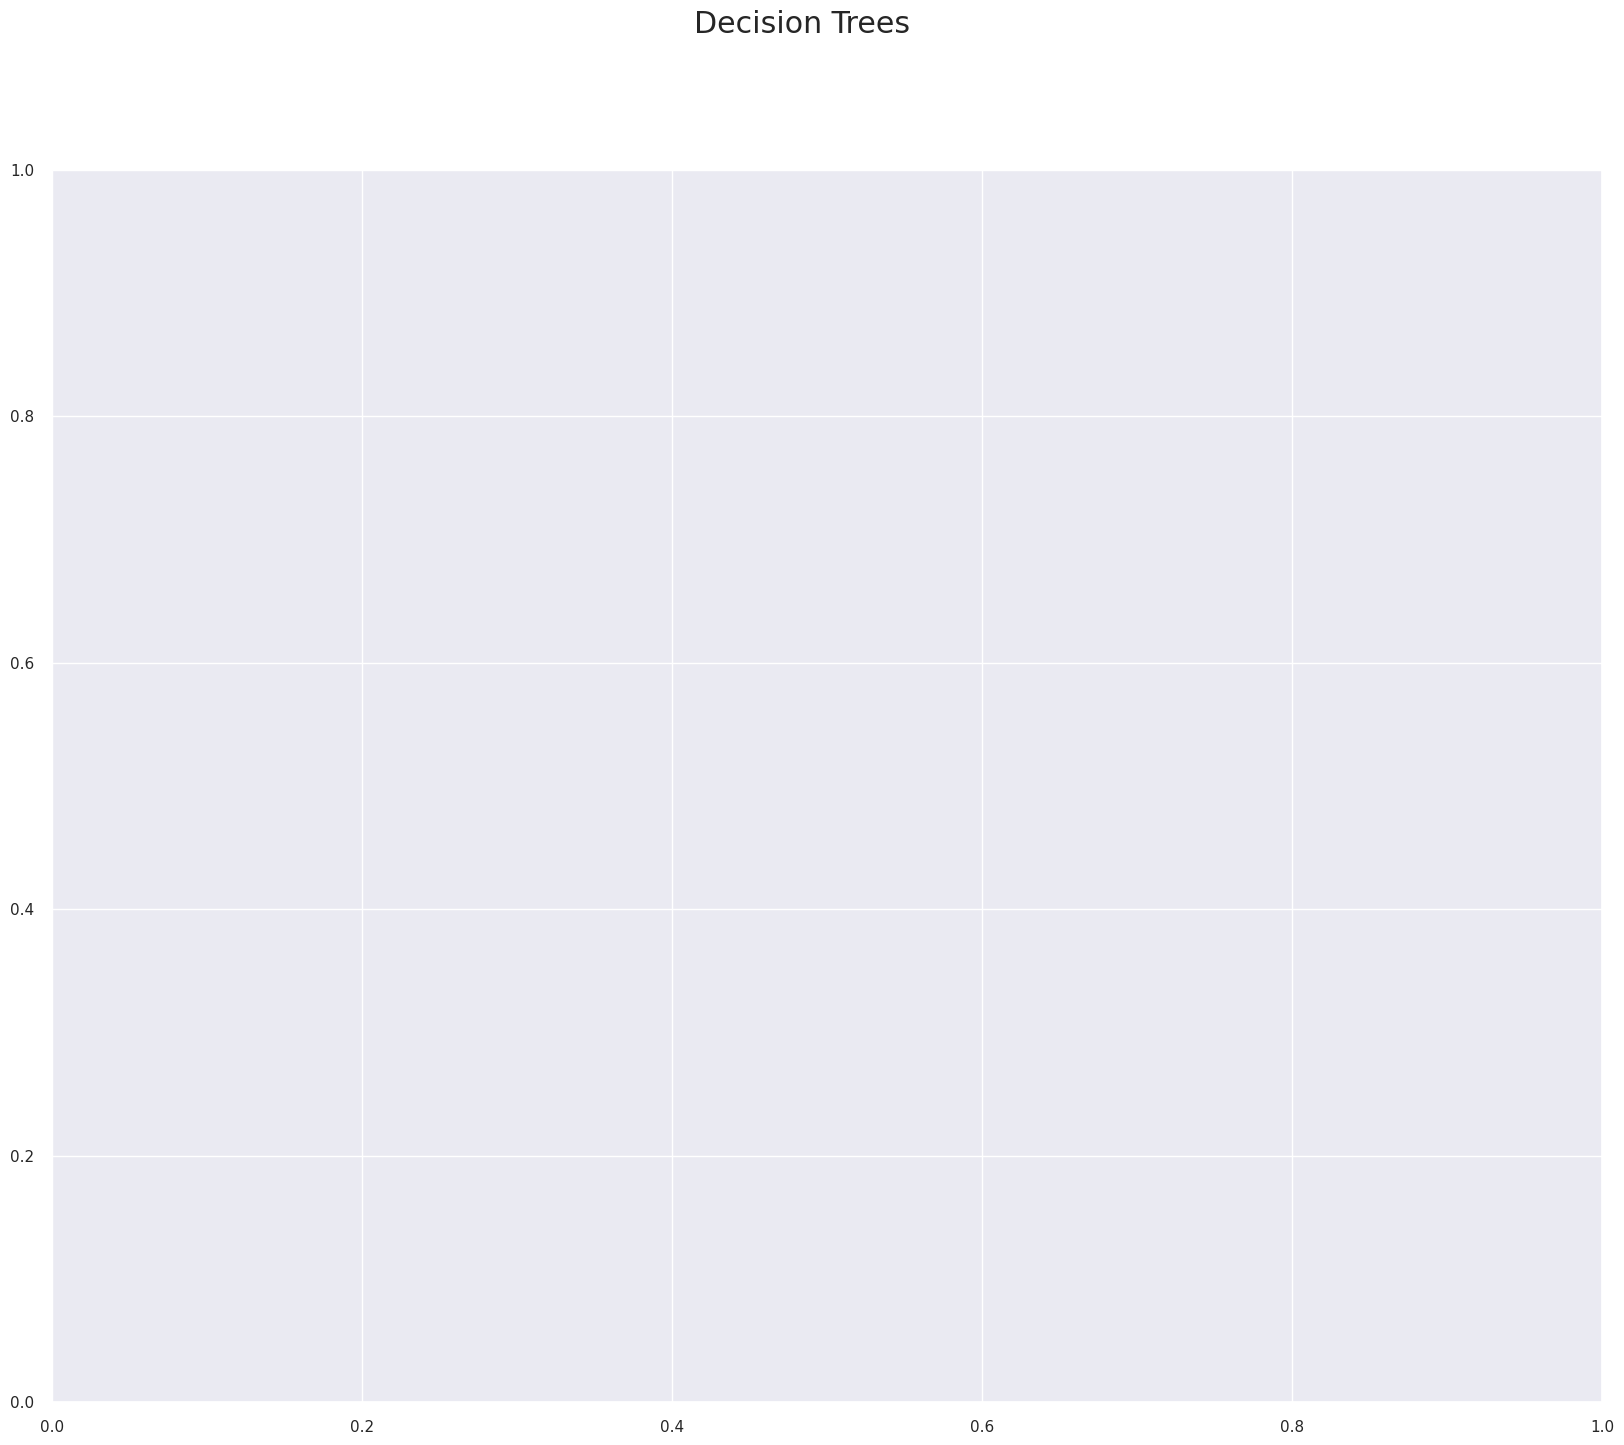

In [131]:
evaluate_model(tuned_dt)

In [132]:
#Create K Neighbors Model

knn = create_model('knn')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [133]:
#Tune K Neighbors Model


tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

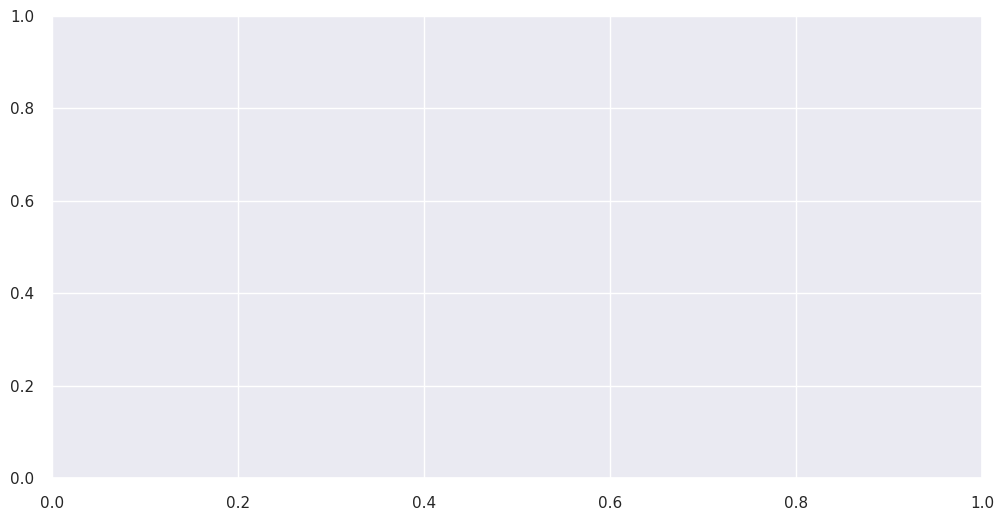

In [134]:
evaluate_model(tuned_knn)

In [159]:
#Create Logistic Regression Model


lr = create_model('lr')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [136]:
#une Logistic Regression Model


tuned_lr = tune_model(lr)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

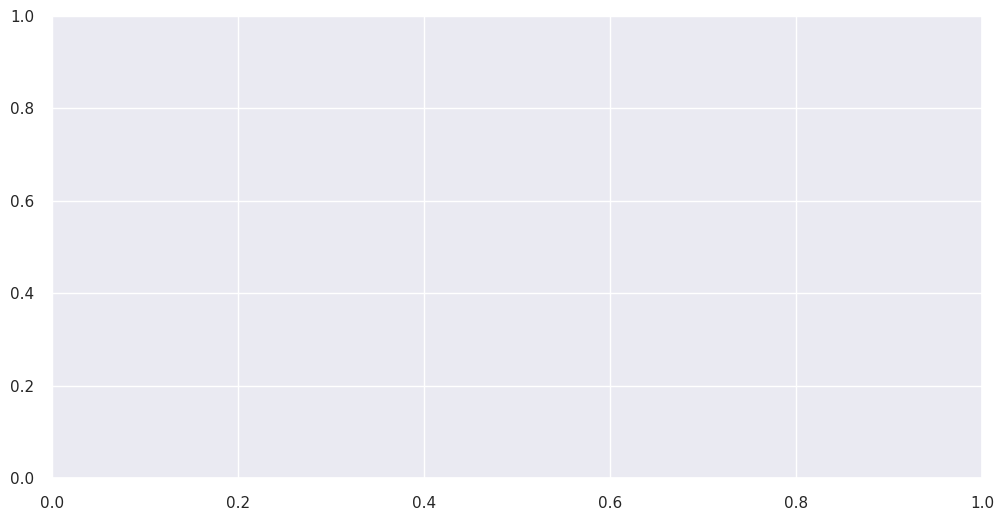

In [137]:
evaluate_model(tuned_lr)

In [ ]:
#Create Random Forest Model


rf = create_model('rf')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [138]:
#Tune Random Forest Model


tuned_rf = tune_model(rf)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

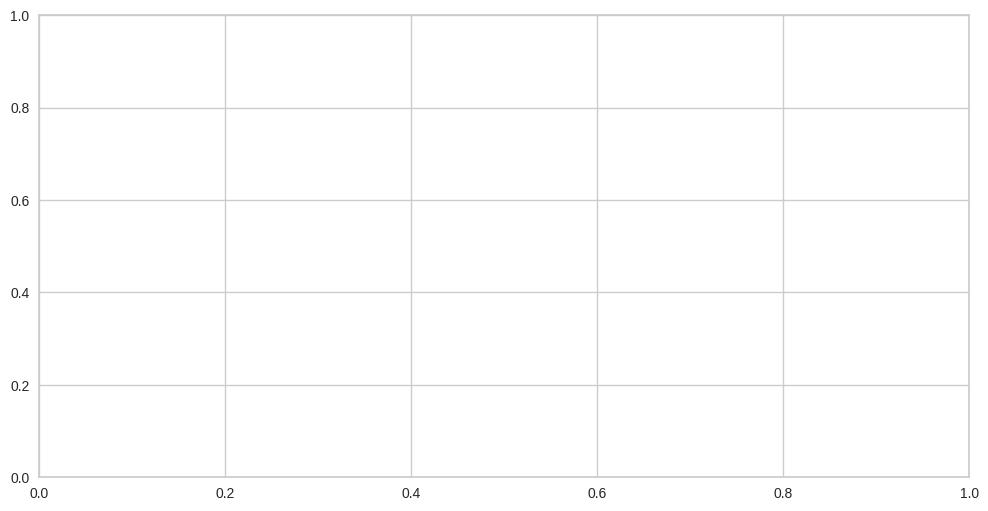

In [ ]:
evaluate_model(tuned_rf)

Tune the Best Model



In [139]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model = tune_model(best_model)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [140]:
tuned_best_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)

In [ ]:
evaluate_model(tuned_best_model)


**Classification + PCA**

In [141]:
clf_pca = setup(data=df, target='class', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

In [142]:
#show the best model and their statistics
best_model_pca = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

**Naive Bayes**

In [162]:
nb_pca = create_model('nb')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [163]:
tuned_nb_pca = tune_model(nb_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

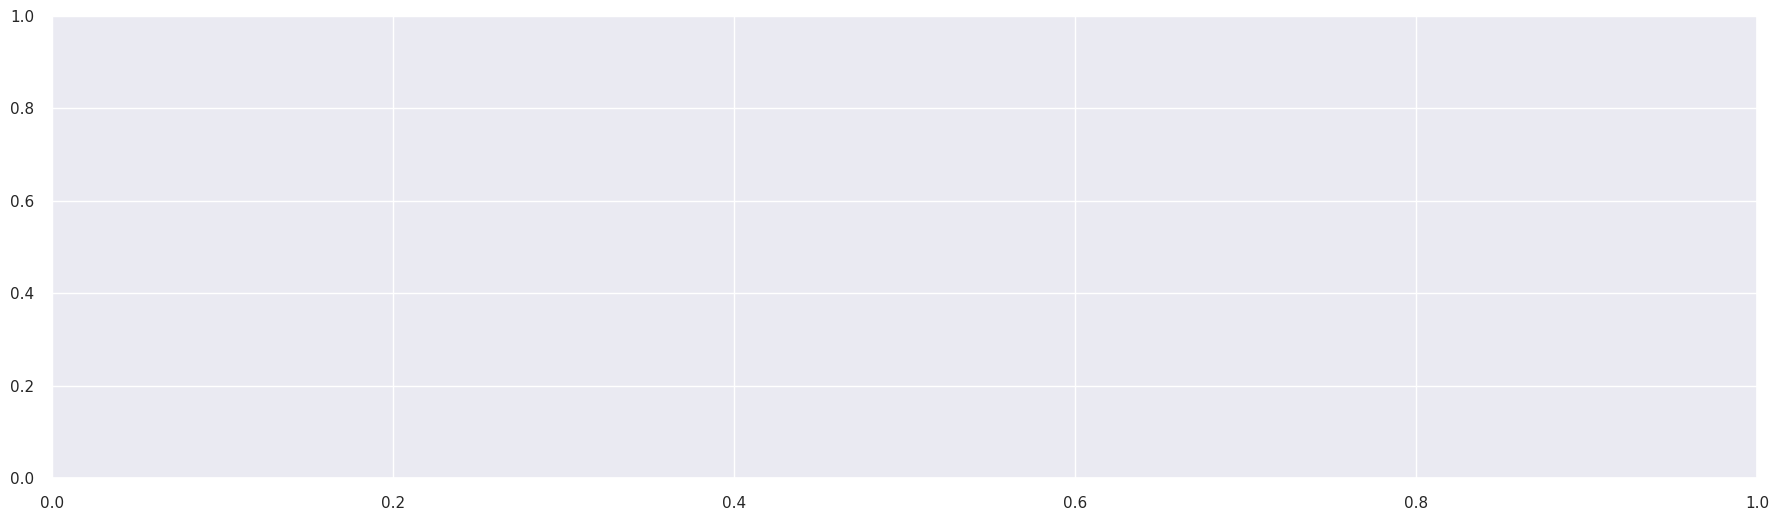

In [164]:
evaluate_model(tuned_nb_pca)

In [143]:
best_model_pca

GaussianNB(priors=None, var_smoothing=1e-09)

In [144]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [145]:
tuned_best_model_pca


GaussianNB(priors=None, var_smoothing=0.002)

In [146]:
#import the SHAP (SHapley Additive exPlanations) library
!pip3 install shap
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**RF Classifier After PCA**

In [147]:
rf_pca = create_model('rf')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [148]:
tuned_rf_pca = tune_model(rf_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

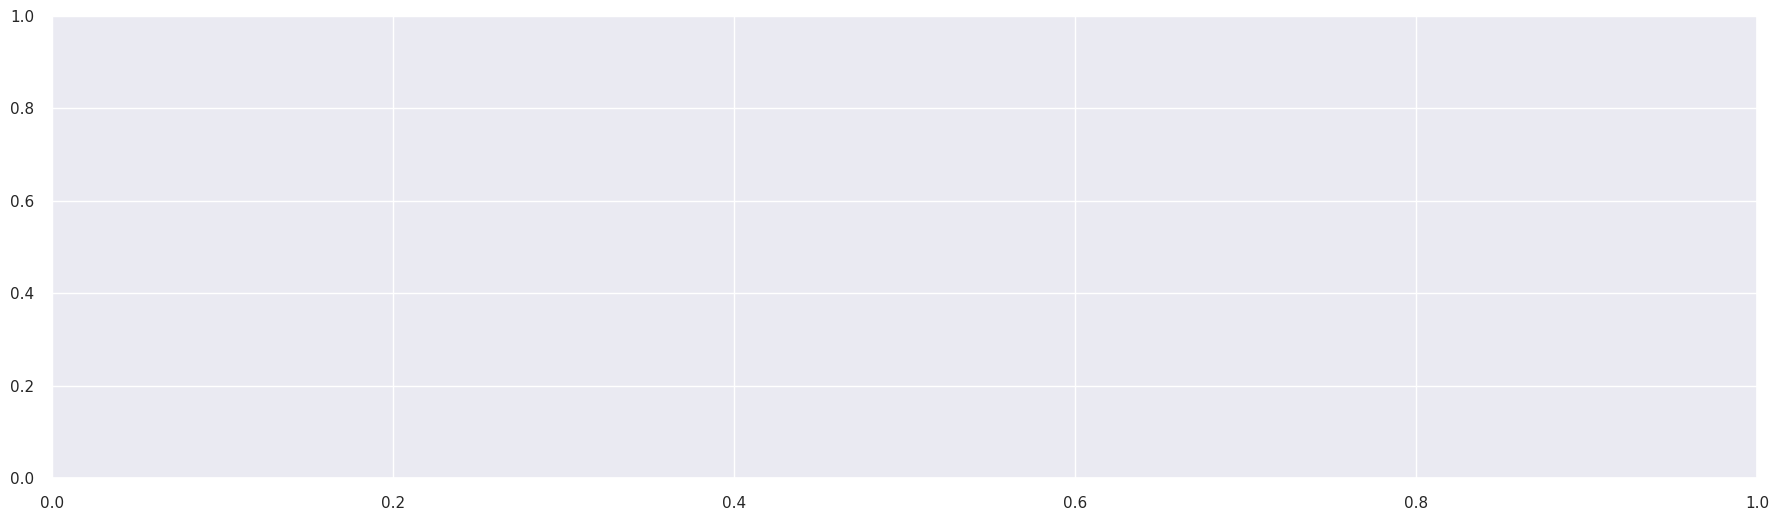

In [160]:
evaluate_model(tuned_rf_pca)

**IR**

In [150]:
lr_pca = create_model(lr)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [156]:
tuned_Ir_pca = tune_model(lr_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

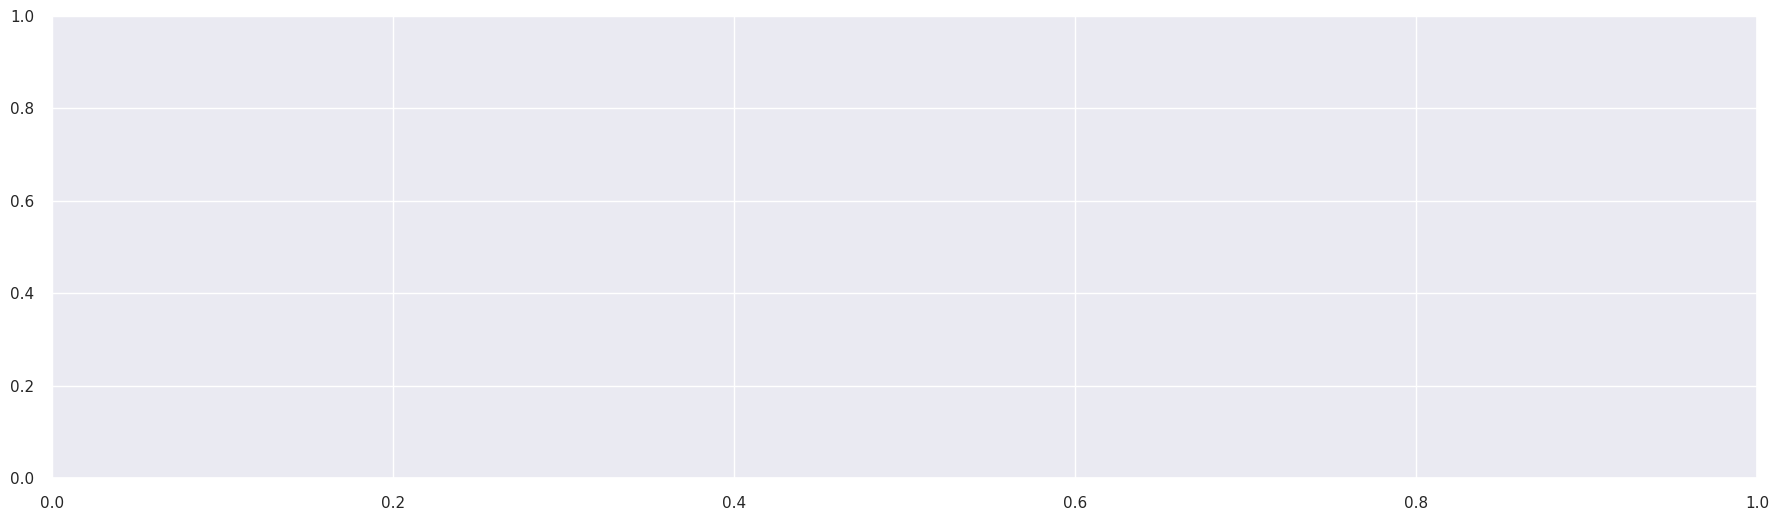

In [157]:
evaluate_model(tuned_Ir_pca)

In [171]:
qda_pca = create_model('qda')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [172]:
tuned_qda_pca = tune_model(qda_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

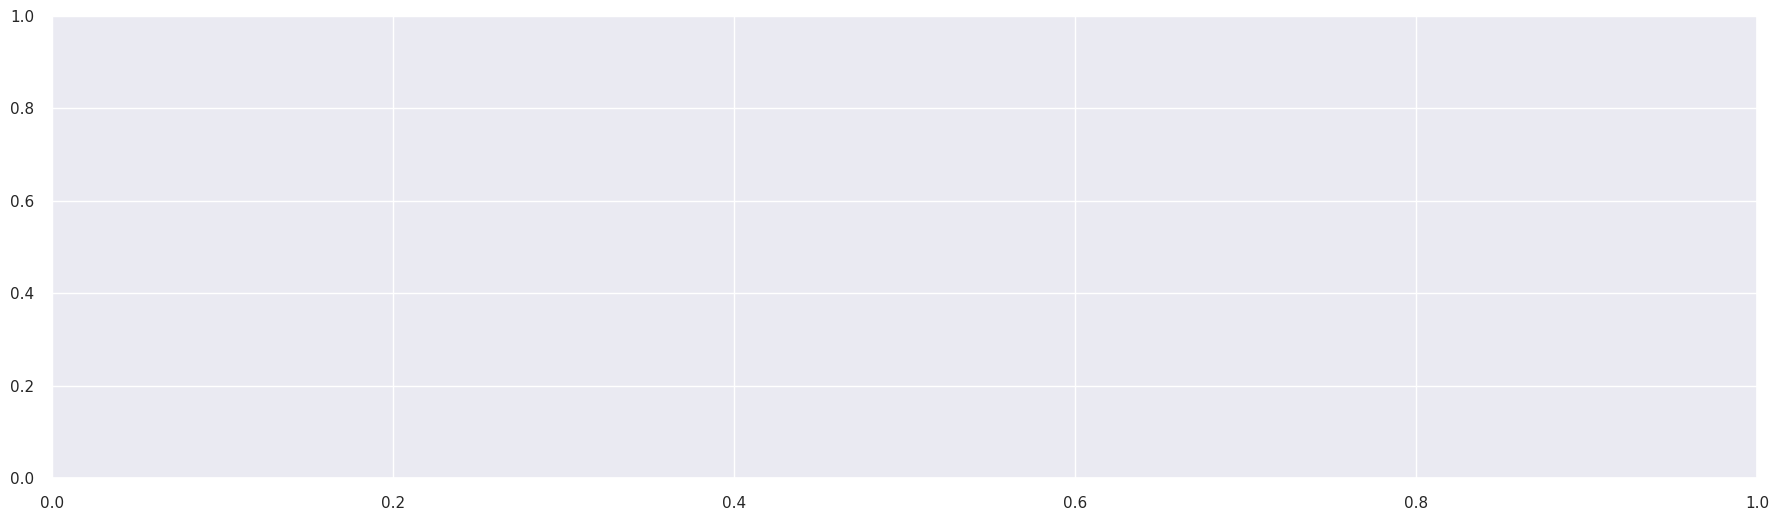

In [173]:
evaluate_model(tuned_qda_pca)

In [174]:
knn_pca = create_model('knn')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [178]:
tuned_knn_pca = tune_model(knn_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

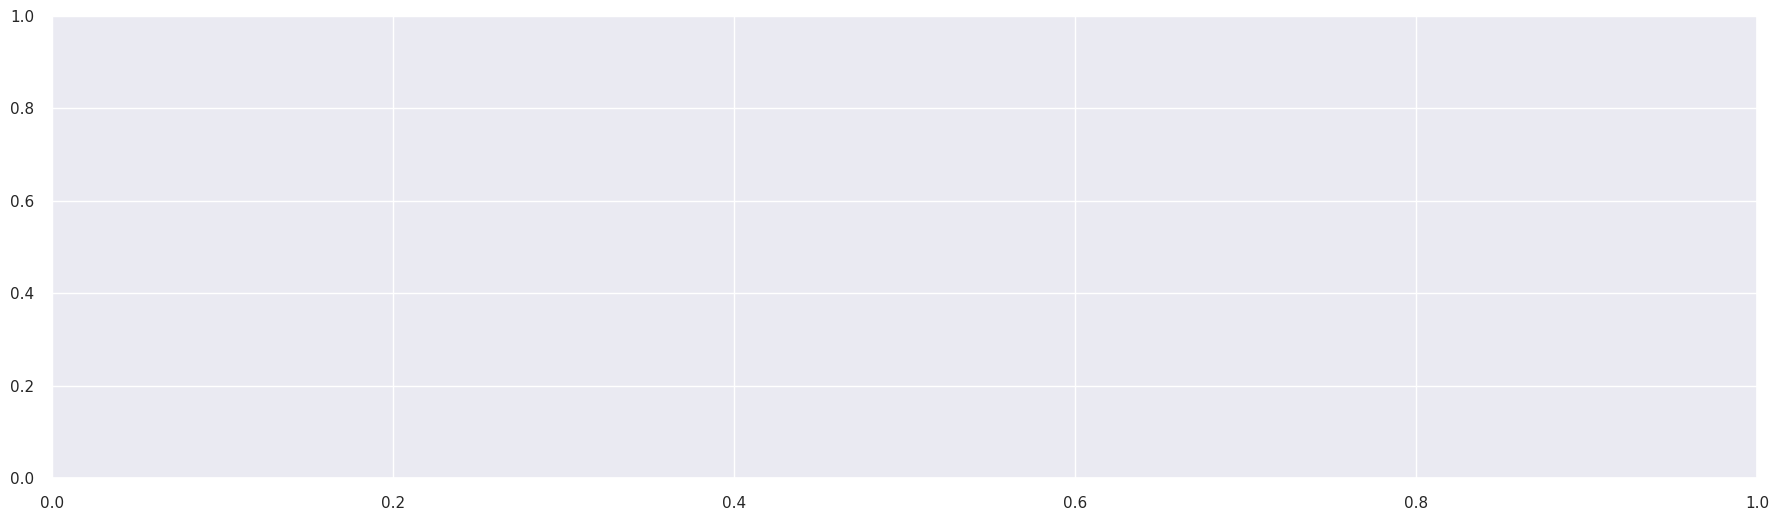

In [179]:
evaluate_model(tuned_knn_pca)

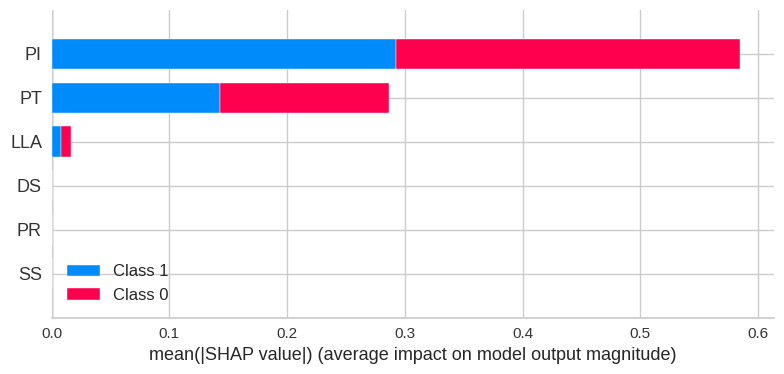

In [ ]:
explainer = shap.TreeExplainer(tuned_rf_pca)
X = df.drop('class', axis=1)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X)

In [ ]:
# Machine Learning Modules
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
Import shap
interpret_model(tuned_et_pca, plot='summary')


SyntaxError: ignored

In [ ]:
def interpret_model(tuned_rf_pca, plot='summary')
